<a href="https://colab.research.google.com/github/jessalynlc/IDS705_final_project/blob/main/data_scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import requests
import json
import pandas as pd
import numpy as np

In [2]:
%reset -f


# 1. Data Preparation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('all_hourly_data.csv')

# 2. Feature Engineering

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('all_hourly_data.csv')

## 2.1 Target Variable

/var/folders/dw/nmtrd1tj5cz_w43lfpr57f380000gn/T/ipykernel_9832/3798291774.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['interval_start_local'] = pd.to_datetime(df['interval_start_local'])


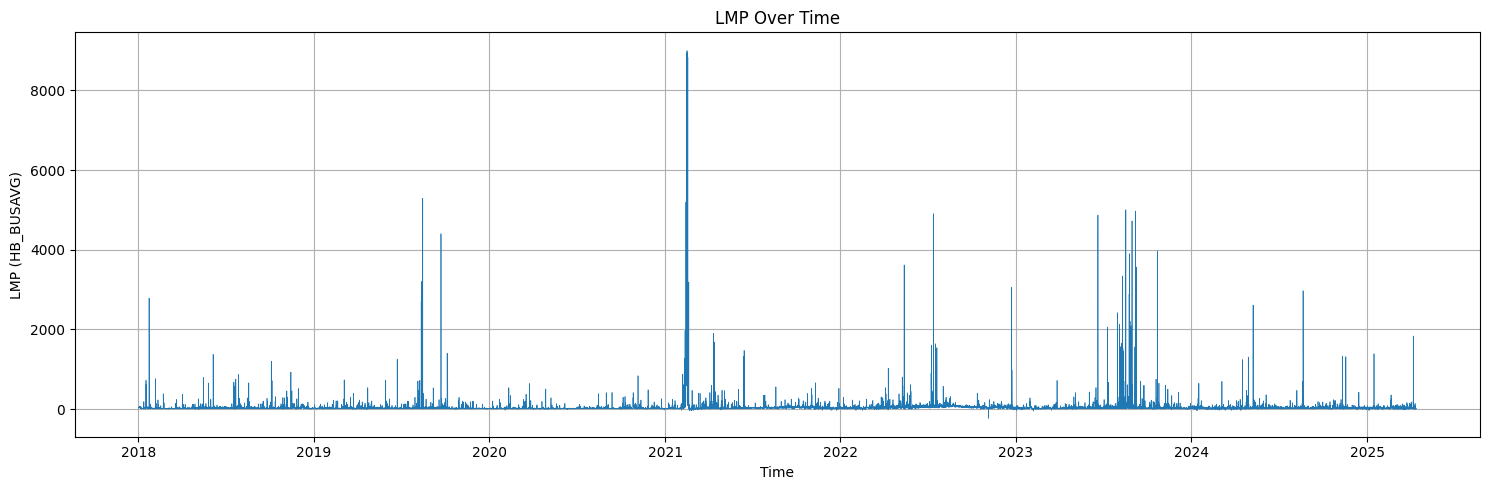

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#
df = pd.read_csv('all_hourly_data.csv')

#
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'])

#
df = df.sort_values('interval_start_local')

#
plt.figure(figsize=(15, 5))
plt.plot(df['interval_start_local'], df['lmp_HB_BUSAVG'], linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('LMP (HB_BUSAVG)')
plt.title('LMP Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


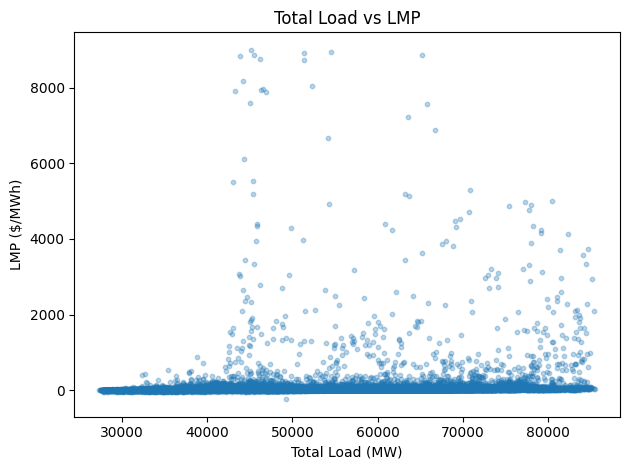

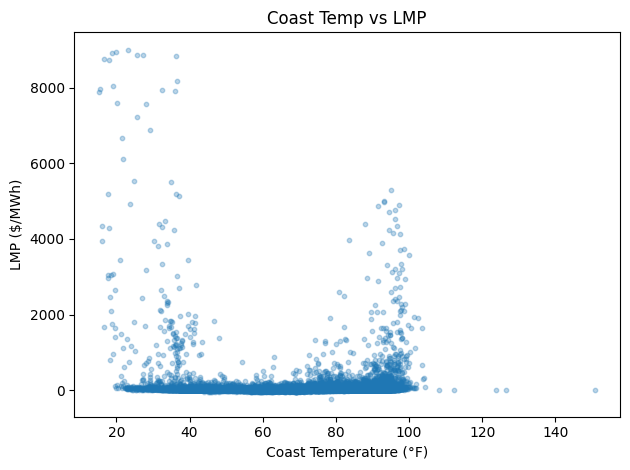

In [6]:
import matplotlib.pyplot as plt

# 1) total_load vs LMP
plt.figure()
plt.scatter(df['total_load'], df['lmp_HB_BUSAVG'], s=10, alpha=0.3)
plt.xlabel('Total Load (MW)')
plt.ylabel('LMP ($/MWh)')
plt.title('Total Load vs LMP')
plt.tight_layout()
plt.show()

# 2) 不同区域温度 vs LMP（以 coast_temp 为例）
plt.figure()
plt.scatter(df['coast_temp'], df['lmp_HB_BUSAVG'], s=10, alpha=0.3)
plt.xlabel('Coast Temperature (°F)')
plt.ylabel('LMP ($/MWh)')
plt.title('Coast Temp vs LMP')
plt.tight_layout()
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

#
series = df['lmp_HB_BUSAVG']

#
result = adfuller(series, maxlag=12, regression='c')  #

print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value:        {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")


ADF Statistic: -30.1878
p-value:        0.0000
Critical Value (1%): -3.4305
Critical Value (5%): -2.8616
Critical Value (10%): -2.5668


<Figure size 640x480 with 0 Axes>

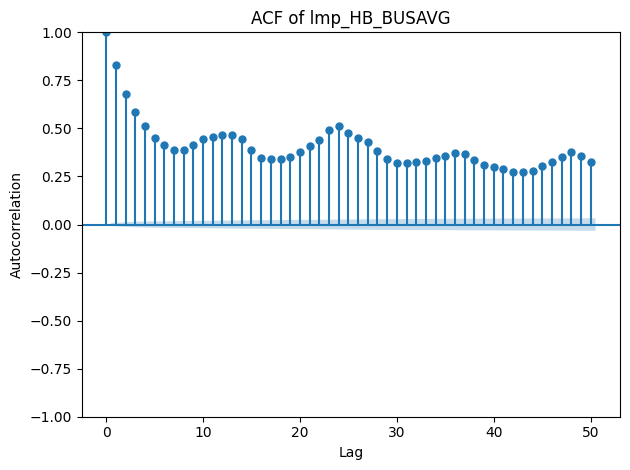

<Figure size 640x480 with 0 Axes>

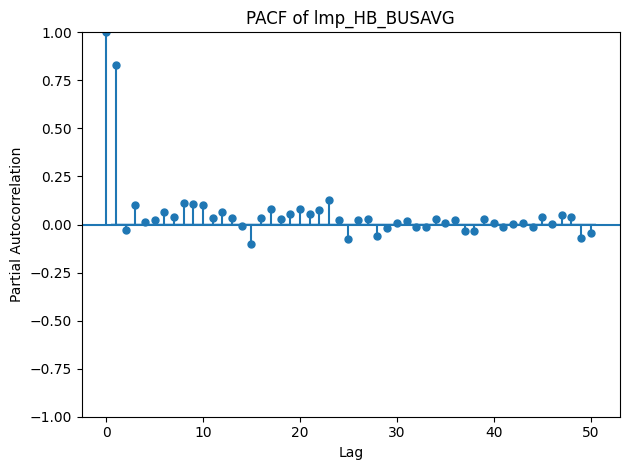

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#
series = df['lmp_HB_BUSAVG'].dropna()

#
plt.figure()
plot_acf(series, lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF of lmp_HB_BUSAVG')
plt.tight_layout()
plt.show()

#
plt.figure()
plot_pacf(series, lags=50)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF of lmp_HB_BUSAVG')
plt.tight_layout()
plt.show()


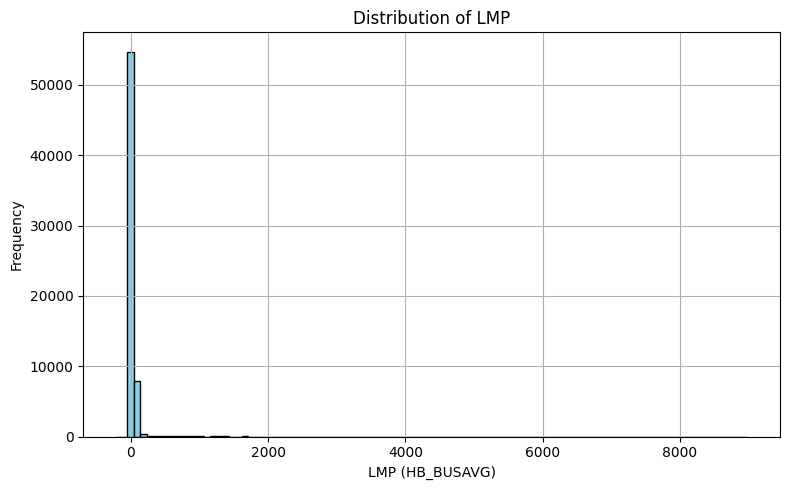

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['lmp_HB_BUSAVG'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('LMP (HB_BUSAVG)')
plt.ylabel('Frequency')
plt.title('Distribution of LMP')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ LMP Summary Statistics:
Mean: 40.05
Median: 21.09
Standard Deviation: 206.53
Skewness: 26.95
Kurtosis: 901.89


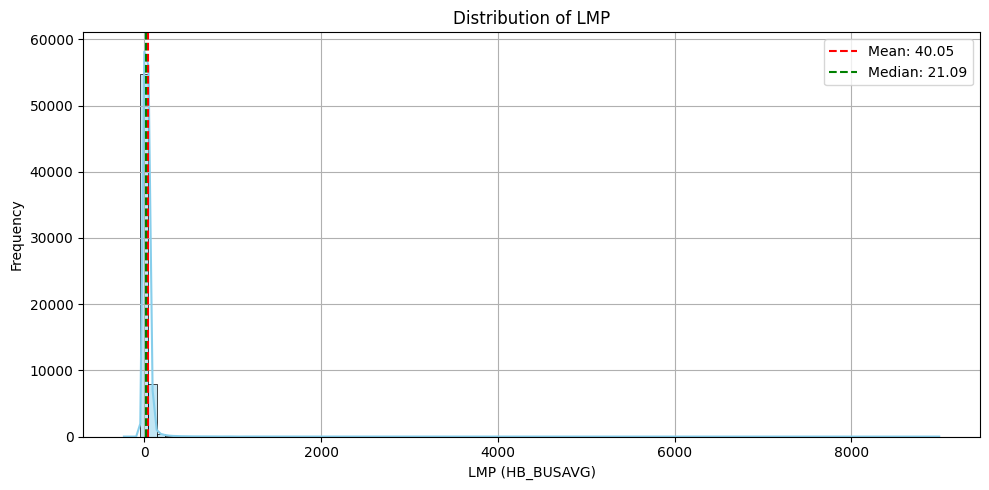

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 读取数据
df = pd.read_csv('all_hourly_data.csv')

# 提取目标变量
lmp = df['lmp_HB_BUSAVG']

# 计算统计量
mean_val = lmp.mean()
median_val = lmp.median()
std_val = lmp.std()
skew_val = skew(lmp)
kurt_val = kurtosis(lmp)  # Fisher's definition (normal dist = 0)

# 打印统计量
print(f"✅ LMP Summary Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurt_val:.2f}")

# 分布图
plt.figure(figsize=(10, 5))
sns.histplot(lmp, bins=100, kde=True, color='skyblue')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
plt.xlabel('LMP (HB_BUSAVG)')
plt.ylabel('Frequency')
plt.title('Distribution of LMP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2.2 Feature Engineering

In [11]:
import pandas as pd
import numpy as np

#
df = pd.read_csv('all_hourly_data.csv')

#
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'], utc=True)


df['day_of_week']  = df['interval_start_local'].dt.dayofweek  #
df['day_of_month'] = df['interval_start_local'].dt.day       #
df['month']        = df['interval_start_local'].dt.month     #


# Lag Features
for lag in [1, 2, 3, 24, 48]:
    df[f'lmp_lag_{lag}'] = df['lmp_HB_BUSAVG'].shift(lag)

# Rolling Features
df['lmp_roll_mean_24'] = df['lmp_HB_BUSAVG'].rolling(window=24).mean()
df['lmp_roll_mean_48'] = df['lmp_HB_BUSAVG'].rolling(window=48).mean()
df['lmp_roll_mean_96'] = df['lmp_HB_BUSAVG'].rolling(window=48).mean()
df['lmp_roll_mean_168'] = df['lmp_HB_BUSAVG'].rolling(window=168).mean()


#
df = df.dropna().reset_index(drop=True)


In [12]:
#
print(df.isnull().sum())

interval_start_local    0
date                    0
hour                    0
north_x_load            0
south_load              0
west_x_load             0
houston_load            0
total_load              0
lmp_HB_BUSAVG           0
coal_and_lignite        0
hydro                   0
nuclear                 0
power_storage           0
solar                   0
wind                    0
natural_gas             0
other_gen               0
coast_temp              0
east_temp               0
far_west_temp           0
north_y_temp            0
north_central_temp      0
south_central_temp      0
southern_temp           0
west_y_temp             0
day_of_week             0
day_of_month            0
month                   0
lmp_lag_1               0
lmp_lag_2               0
lmp_lag_3               0
lmp_lag_24              0
lmp_lag_48              0
lmp_roll_mean_24        0
lmp_roll_mean_48        0
lmp_roll_mean_96        0
lmp_roll_mean_168       0
dtype: int64


## 2.3 Correlation Matrix

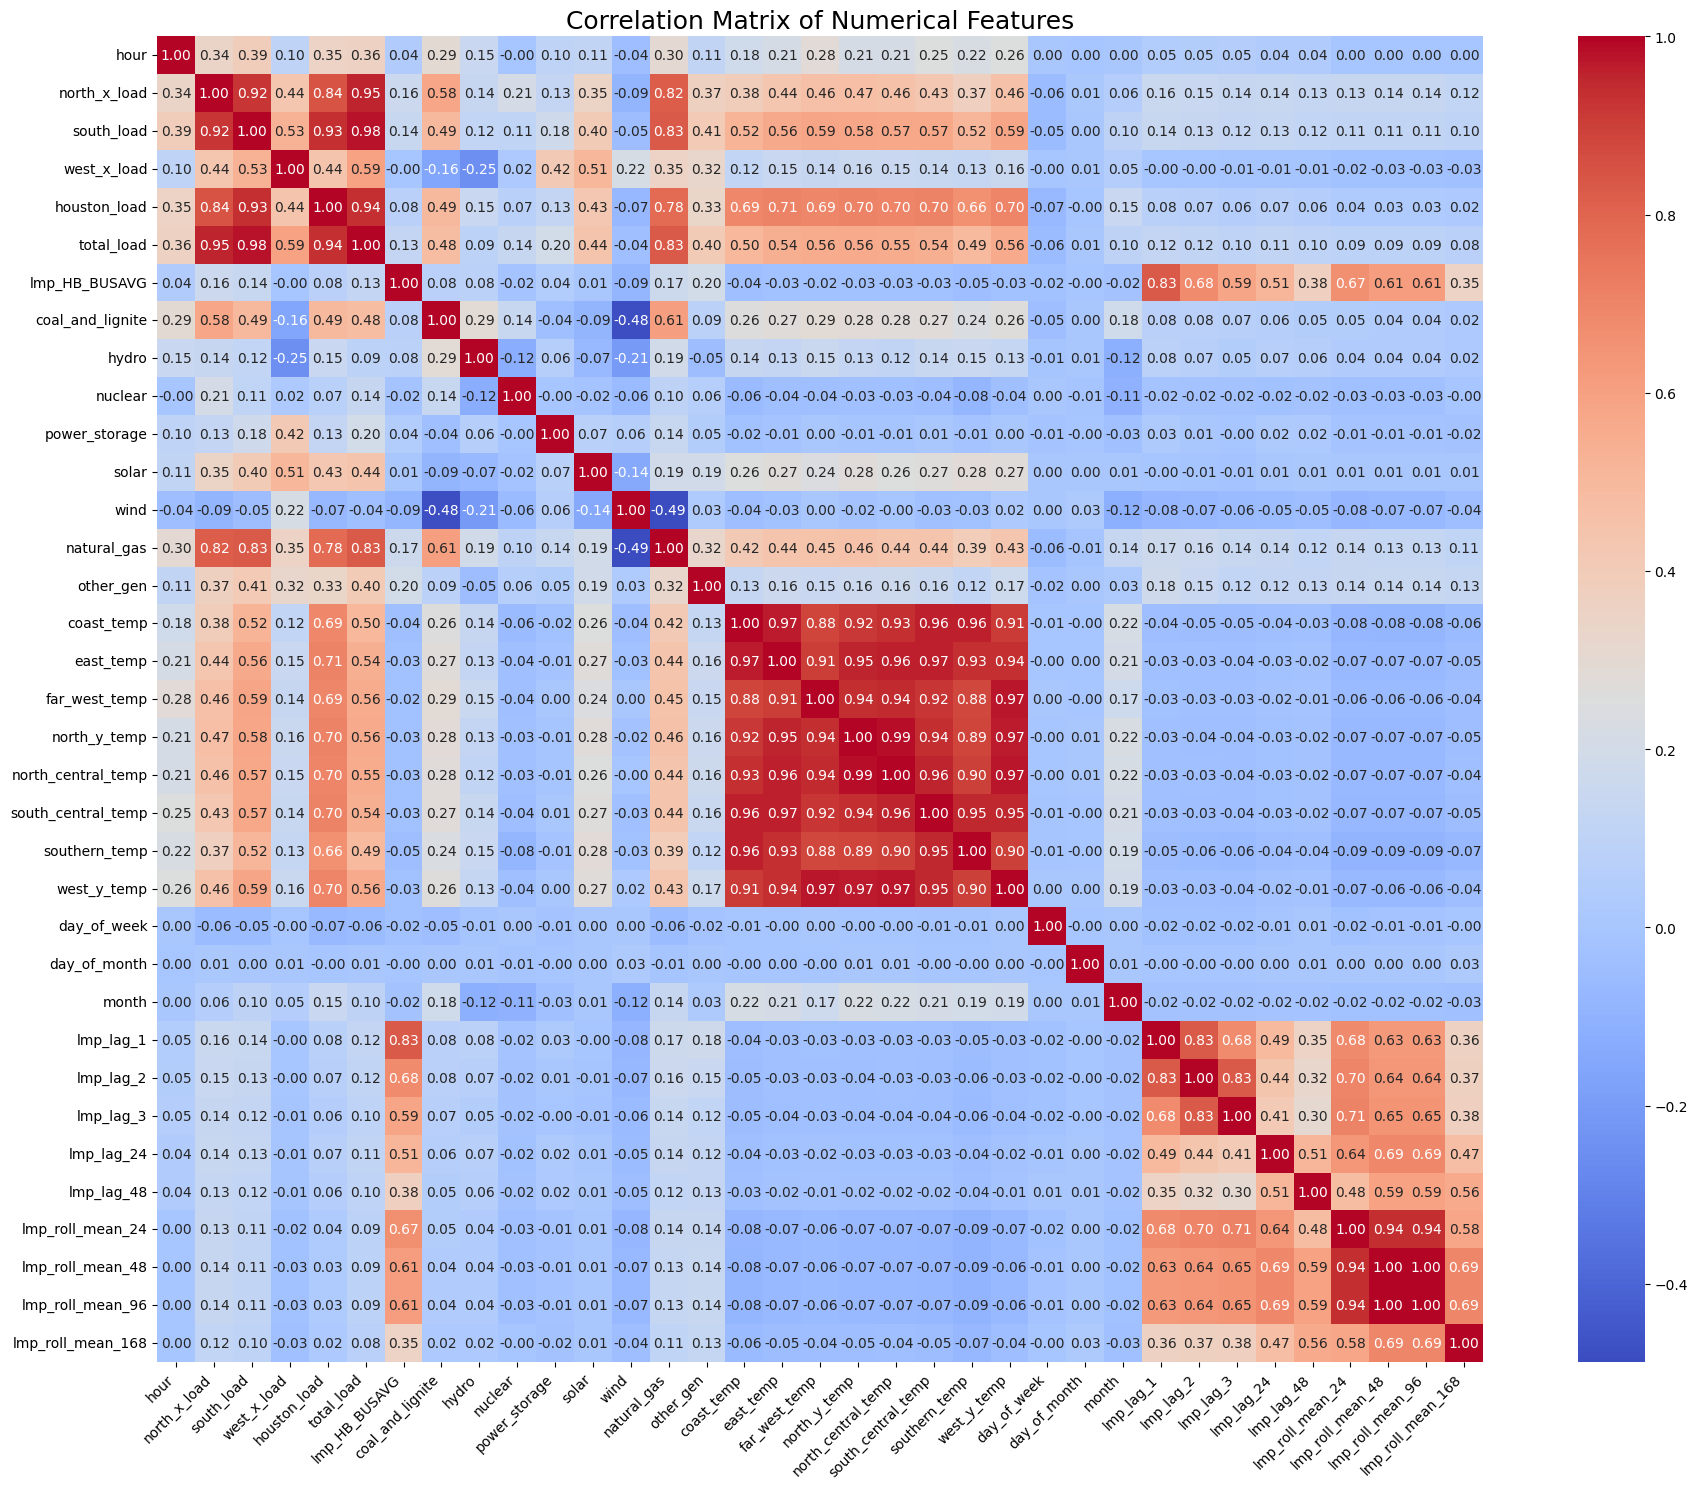

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#
numerical_columns = df.select_dtypes(include=[np.number])

#
correlation_matrix = numerical_columns.corr()

#
plt.figure(figsize=(20, 15))  #
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Numerical Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


## 2.4 Variable Importance

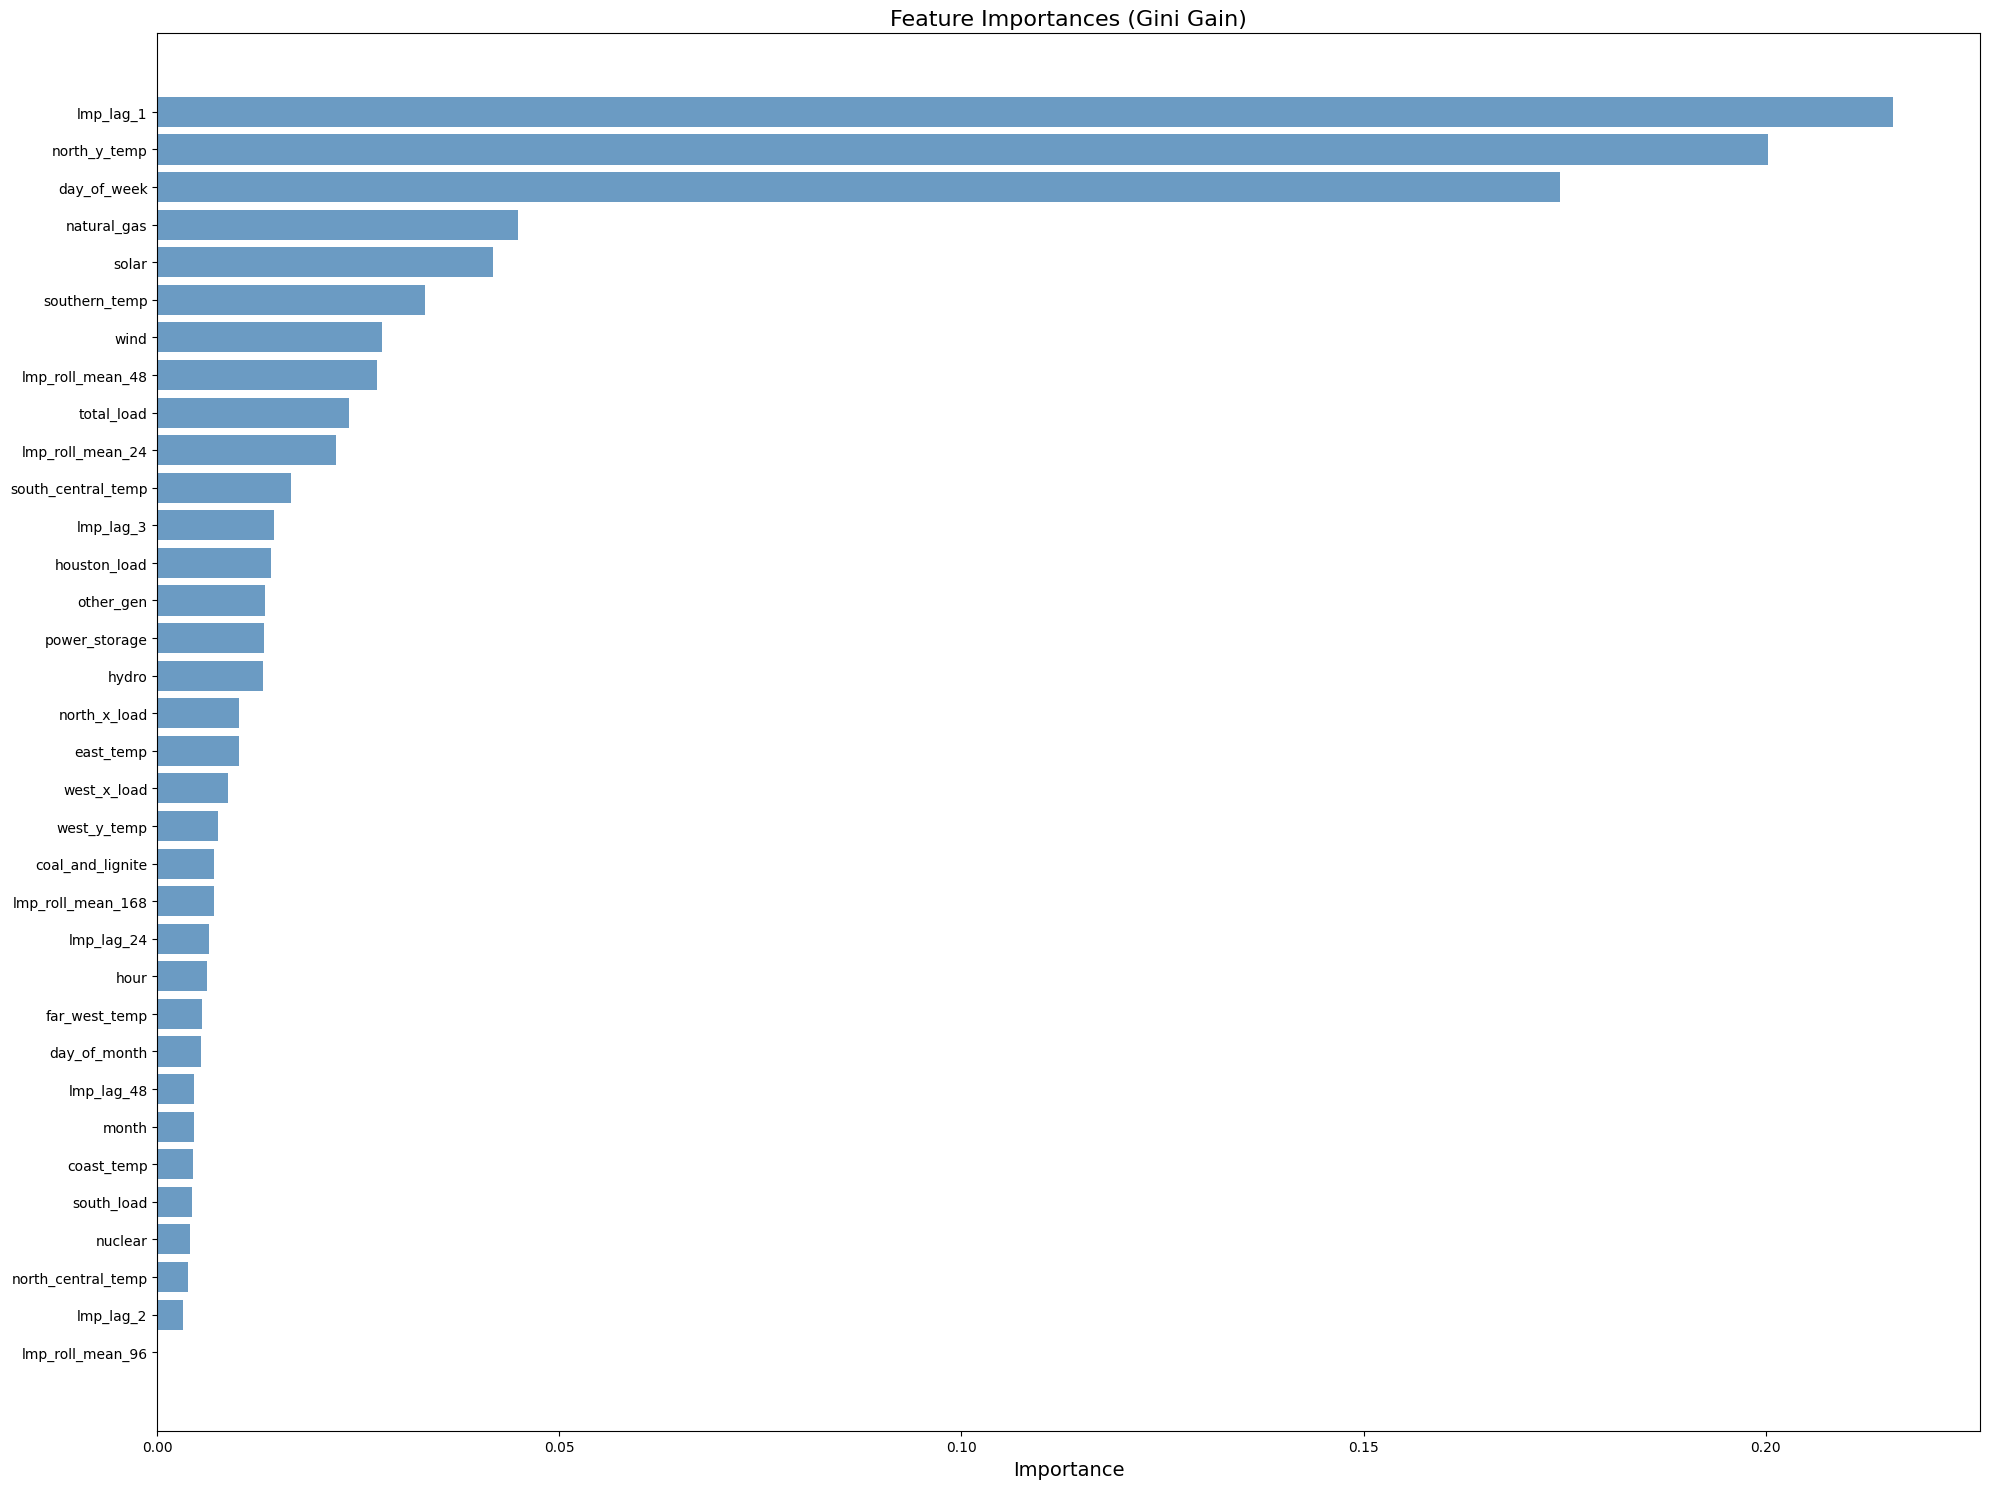

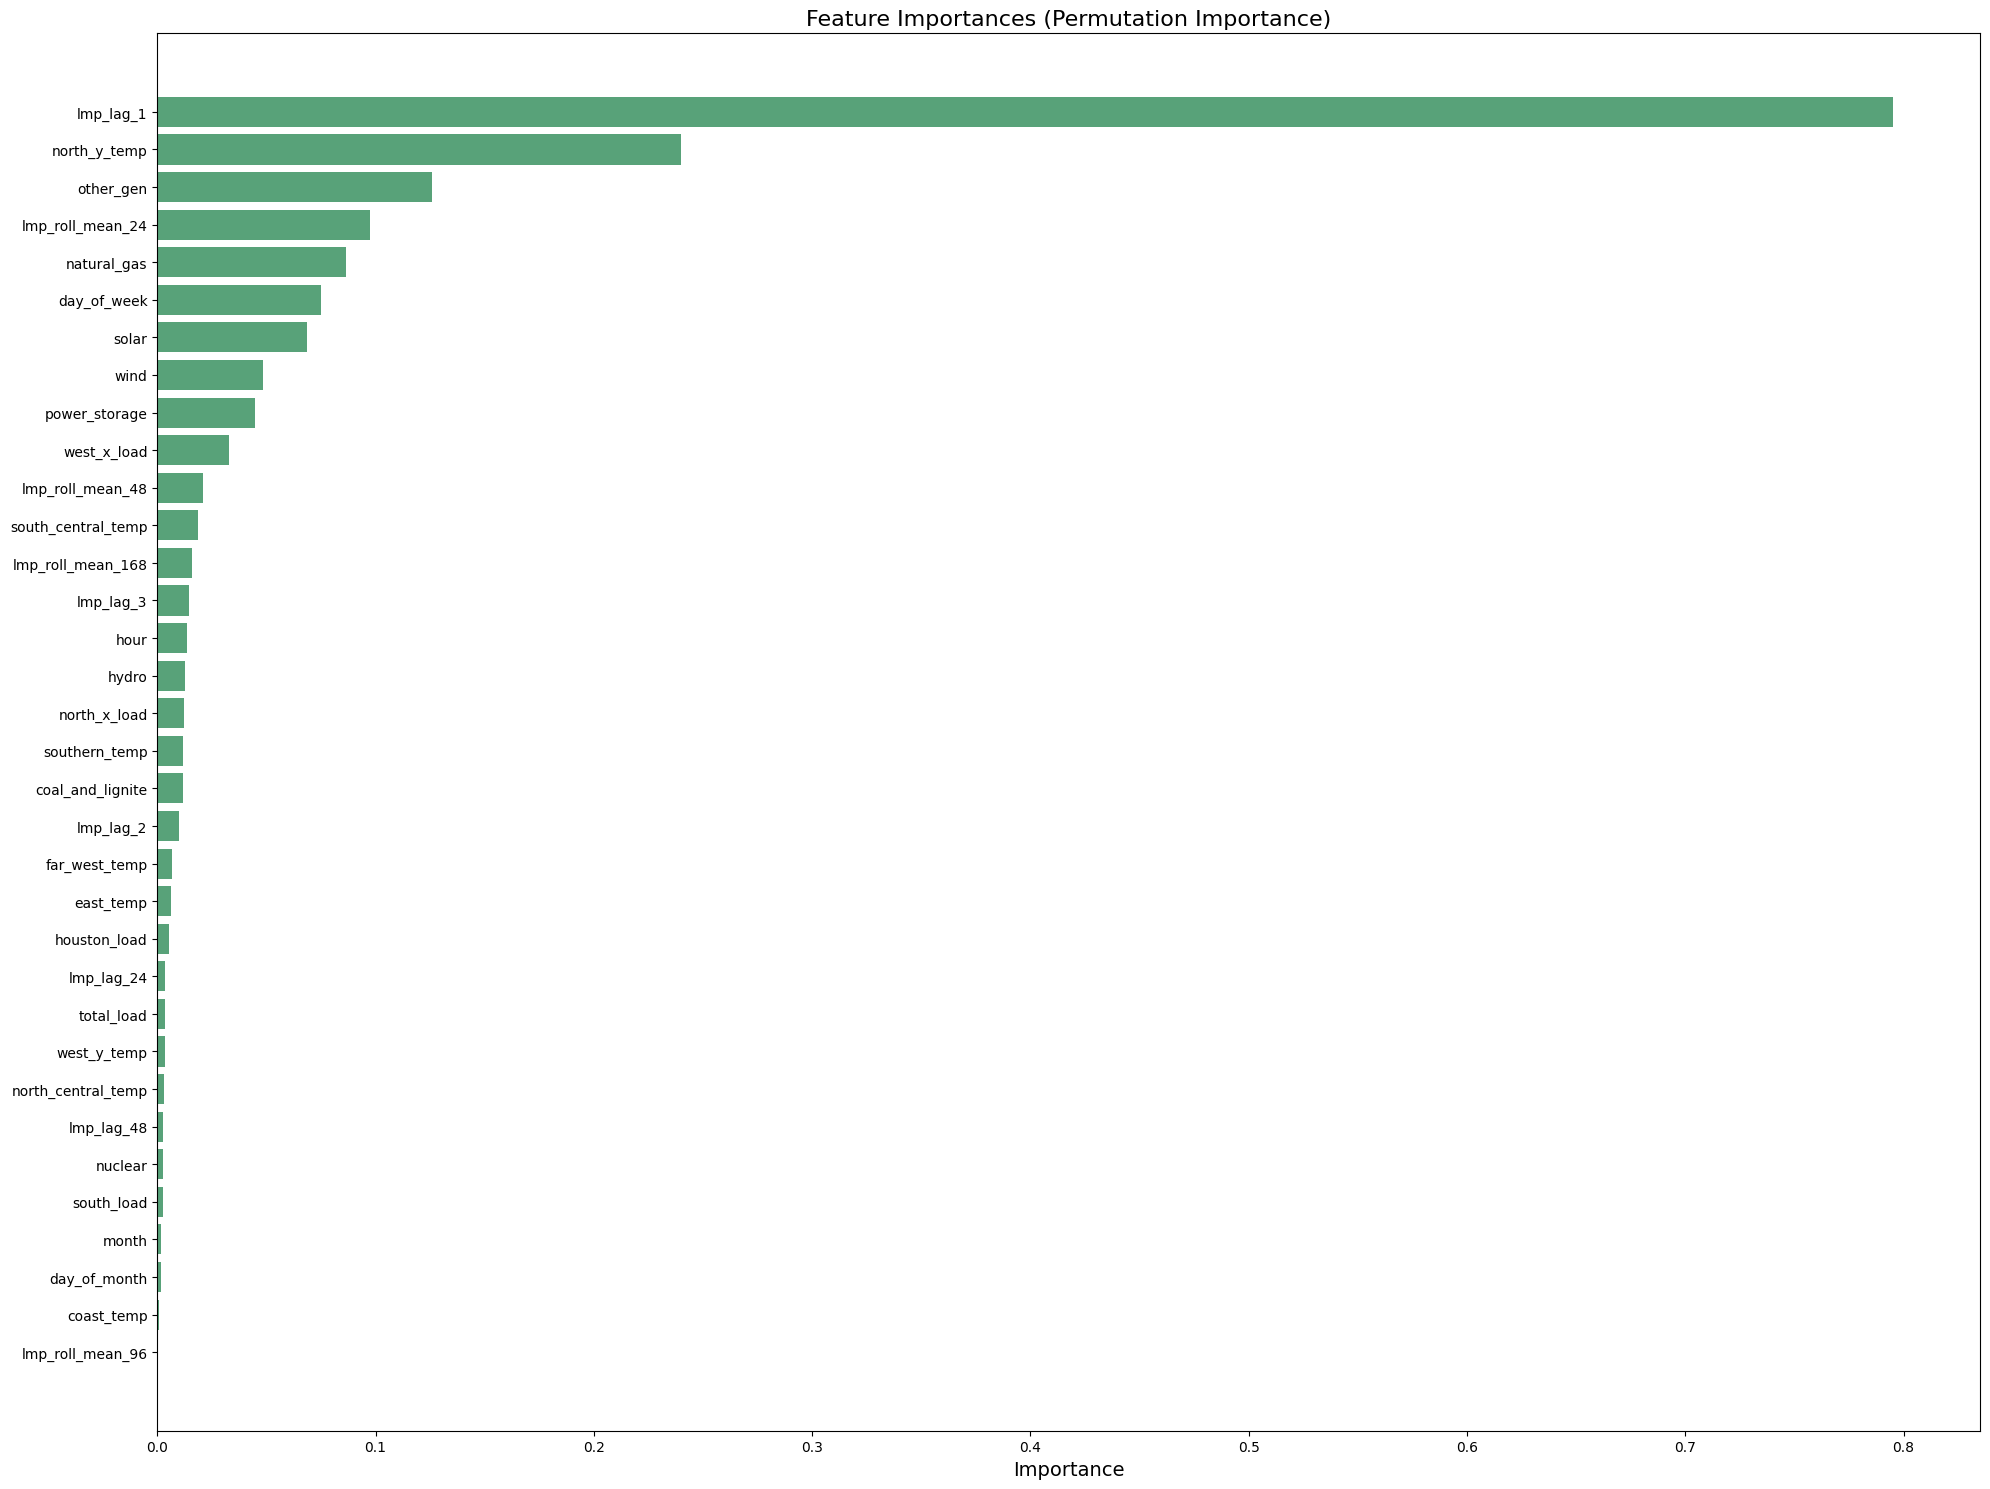

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

# 1. 目标变量和特征
target = df['lmp_HB_BUSAVG']

features = df.drop(columns=['lmp_HB_BUSAVG', 'interval_start_local'])
features = features.select_dtypes(include=[np.number])
# 2. 训练 XGBoost 模型
model = XGBRegressor(random_state=42, n_estimators=500, learning_rate=0.05)
model.fit(features, target)

# 3. Gini Gain 重要性
gini_importance = model.feature_importances_

# 4. Permutation Importance
perm_importance = permutation_importance(model, features, target, n_repeats=10, random_state=42)

# 5. Gini排序
sorted_idx_gini = np.argsort(gini_importance)[::-1]
features_sorted_gini = features.columns[sorted_idx_gini]
gini_sorted = gini_importance[sorted_idx_gini]

# 6. Permutation排序
sorted_idx_perm = perm_importance.importances_mean.argsort()[::-1]
features_sorted_perm = features.columns[sorted_idx_perm]
perm_sorted = perm_importance.importances_mean[sorted_idx_perm]

# 7. Gini图
plt.figure(figsize=(20, 15))
plt.barh(features_sorted_gini, gini_sorted, color="steelblue", alpha=0.8)
plt.gca().invert_yaxis()
plt.title("Feature Importances (Gini Gain)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.tight_layout()
plt.savefig("gini_gain_importance.png", dpi=300)
plt.show()

# 8. Permutation图
plt.figure(figsize=(20, 15))
plt.barh(features_sorted_perm, perm_sorted, color="seagreen", alpha=0.8)
plt.gca().invert_yaxis()
plt.title("Feature Importances (Permutation Importance)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.tight_layout()
plt.savefig("permutation_importance.png", dpi=300)
plt.show()


## 2.5 Train-test Split

In [15]:
import pandas as pd


train_start = pd.Timestamp('2018-01-08 06:00:00+0000', tz='UTC')
train_end   = pd.Timestamp('2023-12-31 23:59:59+0000', tz='UTC')
test_start  = pd.Timestamp('2024-01-01 00:00:00+0000', tz='UTC')
test_end    = pd.Timestamp('2025-04-13 04:00:00+0000', tz='UTC')



#
mask_train = (df['interval_start_local'] >= train_start) & (df['interval_start_local'] <= train_end)
mask_test  = (df['interval_start_local'] >= test_start)  & (df['interval_start_local'] <= test_end)

#
train_df = df.loc[mask_train].reset_index(drop=True)
test_df  = df.loc[mask_test].reset_index(drop=True)

#
print(f"training samples: {train_df.shape[0]}, features: {train_df.shape[1]}")
print(f"testing samples：{test_df.shape[0]}, features:{test_df.shape[1]}")


training samples: 52349, features: 37
testing samples：11166, features:37


# 3.Training

## 3.1 Xgboost

### 3.1.1 baseline model

Test MSE:  4582.4819
Test RMSE: 67.6940
Test MAE:  26.6957


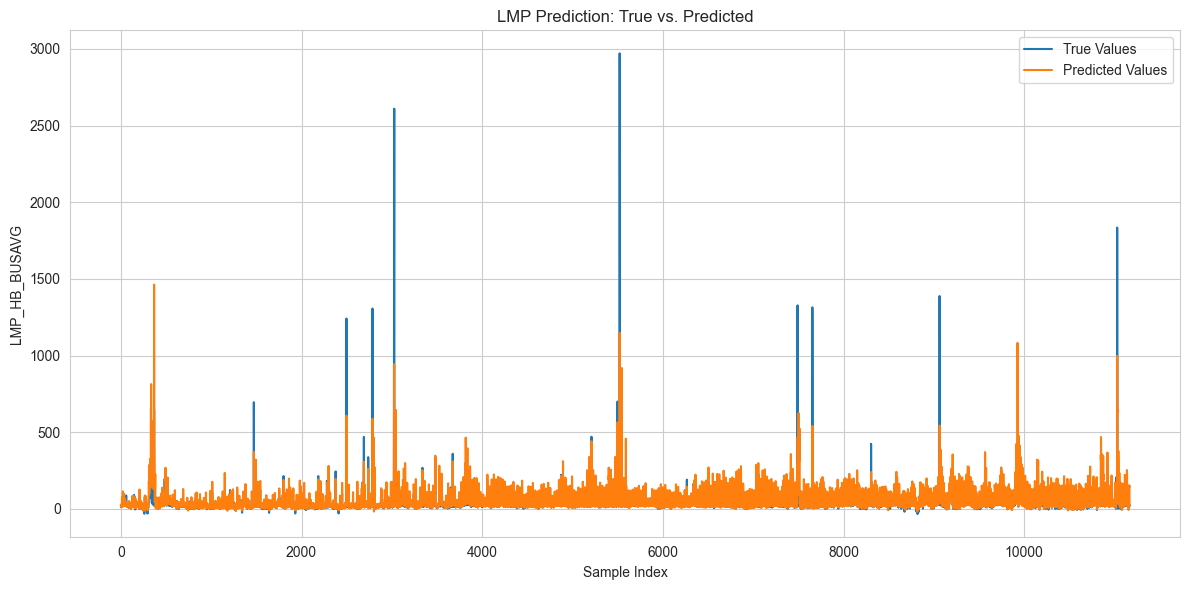

In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# 4. Prepare feature matrix and target vector
exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
features = [col for col in train_df.columns if col not in exclude_cols]

X_train, y_train = train_df[features], train_df['lmp_HB_BUSAVG']
X_test,  y_test  = test_df[features],  test_df['lmp_HB_BUSAVG']

# 5. Train XGBoost regressor
model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Compute evaluation metrics
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")

# 8. Plot true vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred,         label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('LMP_HB_BUSAVG')
plt.title('LMP Prediction: True vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()

### 3.1.2 feature importance

               feature  importance
25           lmp_lag_1    0.194740
17        north_y_temp    0.153826
26           lmp_lag_2    0.077398
18  north_central_temp    0.063829
12         natural_gas    0.048137
10               solar    0.042470
15           east_temp    0.041928
22         day_of_week    0.041348
34    lmp_roll_mean_24    0.028450
27           lmp_lag_3    0.022871
11                wind    0.021680
5           total_load    0.016338
28           lmp_lag_4    0.015707
20       southern_temp    0.015432
13           other_gen    0.014351
29           lmp_lag_5    0.014136
2           south_load    0.013332
7                hydro    0.013330
14          coast_temp    0.013321
32          lmp_lag_24    0.012585
31           lmp_lag_7    0.011854
9        power_storage    0.011326
3          west_x_load    0.010635
16       far_west_temp    0.009970
19  south_central_temp    0.009960
35    lmp_roll_mean_48    0.008652
23        day_of_month    0.008633
33          lmp_lag_

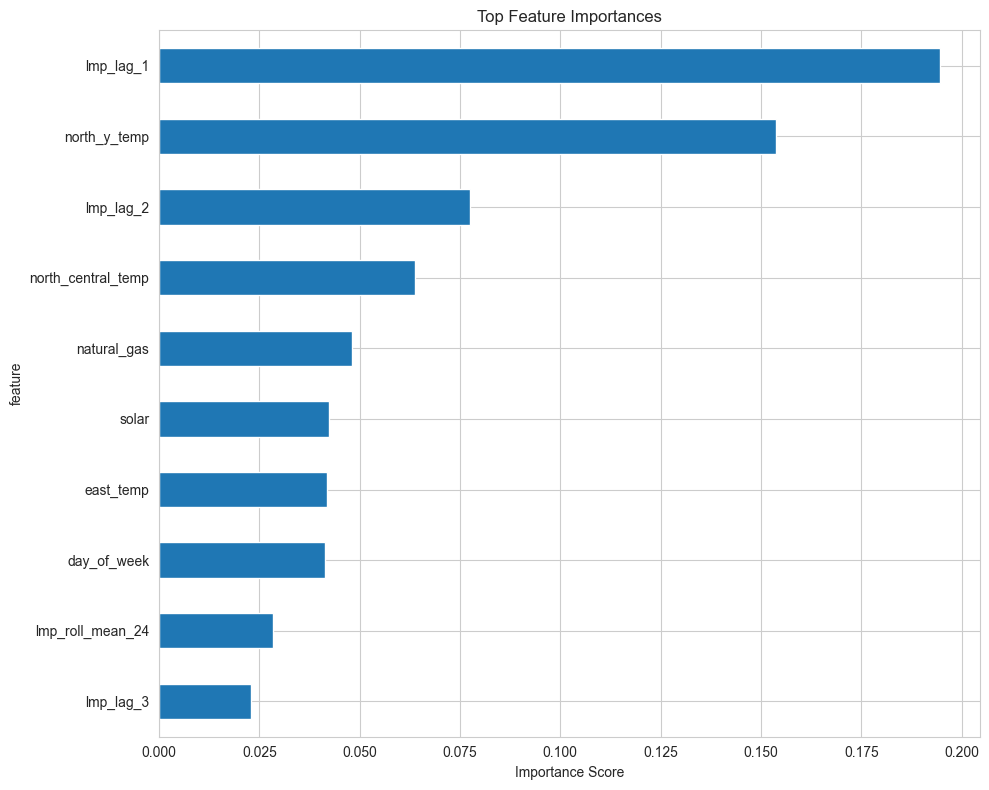

In [19]:
importances = model.feature_importances_

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df)

# Plot top 10
top_n = 10
importance_df.head(top_n).plot(kind='barh', x='feature', y='importance', figsize=(10, 8), legend=False)
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

               feature  importance
9        power_storage  911.091234
34    lmp_roll_mean_24  664.258195
25           lmp_lag_1  485.943275
19  south_central_temp  400.661635
10               solar  258.797121
28           lmp_lag_4  155.459111
3          west_x_load  127.055407
6     coal_and_lignite  106.952893
20       southern_temp  106.898967
31           lmp_lag_7  106.379325
4         houston_load   88.485527
27           lmp_lag_3   87.847218
0                 hour   87.356524
32          lmp_lag_24   87.083261
18  north_central_temp   70.248433
26           lmp_lag_2   61.706991
14          coast_temp   57.706283
12         natural_gas   56.335655
8              nuclear   43.277686
30           lmp_lag_6   34.002528
2           south_load   28.322404
29           lmp_lag_5   24.713701
17        north_y_temp   19.747828
35    lmp_roll_mean_48   19.476111
5           total_load   15.718157
36   lmp_roll_mean_168   15.558308
7                hydro   15.296401
15           east_te

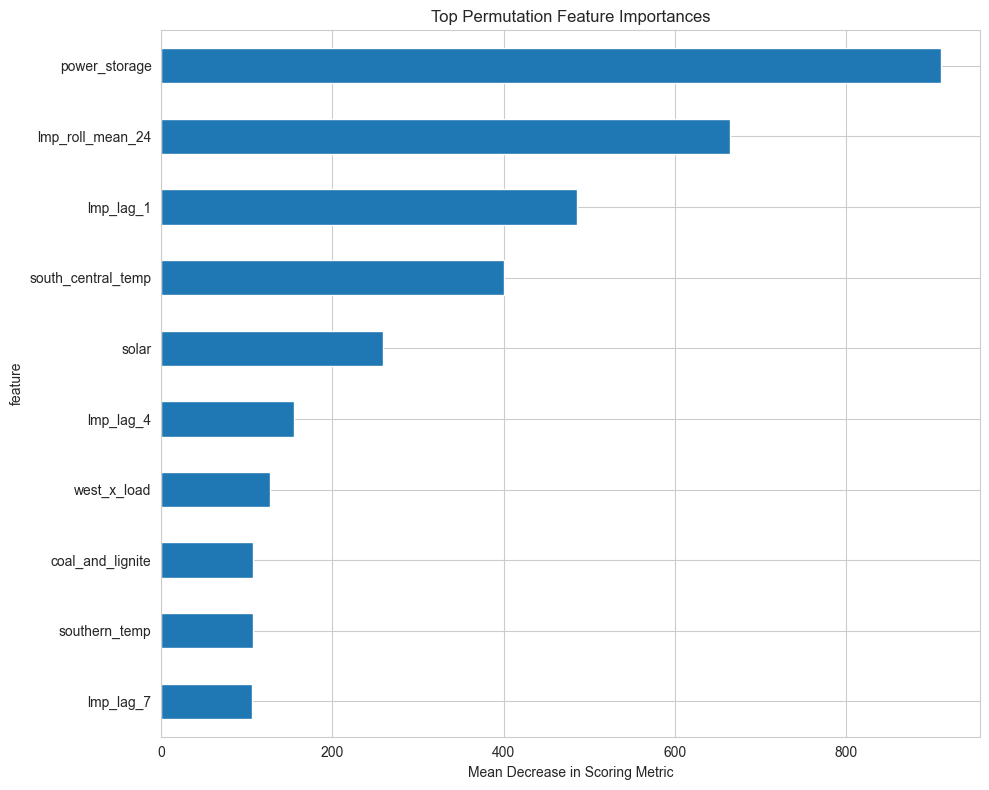

In [22]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt


result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error'
)


perm_df = pd.DataFrame({
    'feature': X_test.columns,

    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)


print(perm_df)


top_n = 10
perm_df.head(top_n).plot(
    kind='barh',
    x='feature',
    y='importance',
    figsize=(10, 8),
    legend=False
)
plt.title("Top Permutation Feature Importances")
plt.gca().invert_yaxis()
plt.xlabel("Mean Decrease in Scoring Metric")
plt.tight_layout()
plt.show()


### 3.1.3 hyperparameter tunning

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import optuna

#
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

#
def objective(trial):
    params = {
        "n_estimators":    trial.suggest_int("n_estimators", 100, 1000),
        "max_depth":       trial.suggest_int("max_depth", 3, 12),
        "learning_rate":   trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "subsample":       trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree":trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma":           trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha":       trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda":      trial.suggest_float("reg_lambda", 0.0, 5.0),
        "verbosity":       0,
        "random_state":    42,
        "objective":       "reg:squarederror",
        "eval_metric":     "rmse"
    }

    fold_rmse = []
    for train_idx, val_idx in tscv.split(X_train):
        #
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = XGBRegressor(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        preds = model.predict(X_val)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val, preds)))

    return float(np.mean(fold_rmse))

#
study = optuna.create_study(
    direction="minimize",
    study_name="xgb_lmp_tuning_tsCV"
)
study.optimize(objective, n_trials=50, timeout=600)

#
print("Best CV RMSE: {:.4f}".format(study.best_value))
print("Best Params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")




[I 2025-04-21 10:03:13,953] A new study created in memory with name: xgb_lmp_tuning_tsCV
[I 2025-04-21 10:03:40,330] Trial 0 finished with value: 190.49652278581524 and parameters: {'n_estimators': 320, 'max_depth': 9, 'learning_rate': 0.00946029787211595, 'subsample': 0.5001018066516465, 'colsample_bytree': 0.7725125167142544, 'gamma': 2.7458820308839855, 'reg_alpha': 2.4627522635986776, 'reg_lambda': 0.09291866544239025}. Best is trial 0 with value: 190.49652278581524.
[I 2025-04-21 10:04:06,234] Trial 1 finished with value: 218.28057330739742 and parameters: {'n_estimators': 433, 'max_depth': 8, 'learning_rate': 0.001000166280909582, 'subsample': 0.9323512772706438, 'colsample_bytree': 0.9966619748224033, 'gamma': 0.057328550272117695, 'reg_alpha': 1.2268996745746859, 'reg_lambda': 0.05734066321011755}. Best is trial 0 with value: 190.49652278581524.
[I 2025-04-21 10:04:25,293] Trial 2 finished with value: 185.90488098588025 and parameters: {'n_estimators': 811, 'max_depth': 4, 'lea

Best CV RMSE: 185.9049
Best Params:
  n_estimators: 811
  max_depth: 4
  learning_rate: 0.0024673655226444477
  subsample: 0.9534535296847209
  colsample_bytree: 0.5420703563825051
  gamma: 3.725731346783462
  reg_alpha: 3.1540907304836274
  reg_lambda: 0.05757005510549751


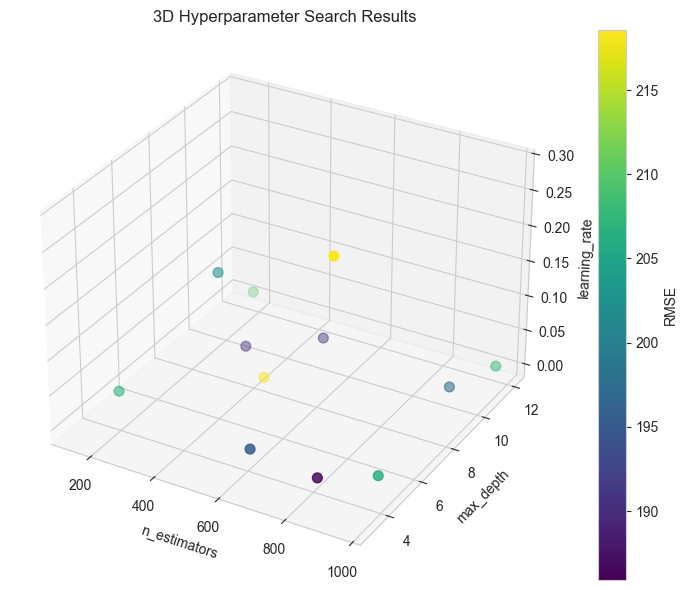

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#
xs = [t.params["n_estimators"]     for t in study.trials]
ys = [t.params["max_depth"]        for t in study.trials]
zs = [t.params["learning_rate"]    for t in study.trials]
vals = [t.value                     for t in study.trials]  # RMSE

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection="3d")
sc  = ax.scatter(xs, ys, zs, c=vals, cmap="viridis", s=50)
fig.colorbar(sc, ax=ax, label="RMSE")

ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("learning_rate")
ax.set_title("3D Hyperparameter Search Results")

plt.tight_layout()
plt.savefig("3D_Hyperparameter_Search_Results.png", dpi=300)
plt.show()


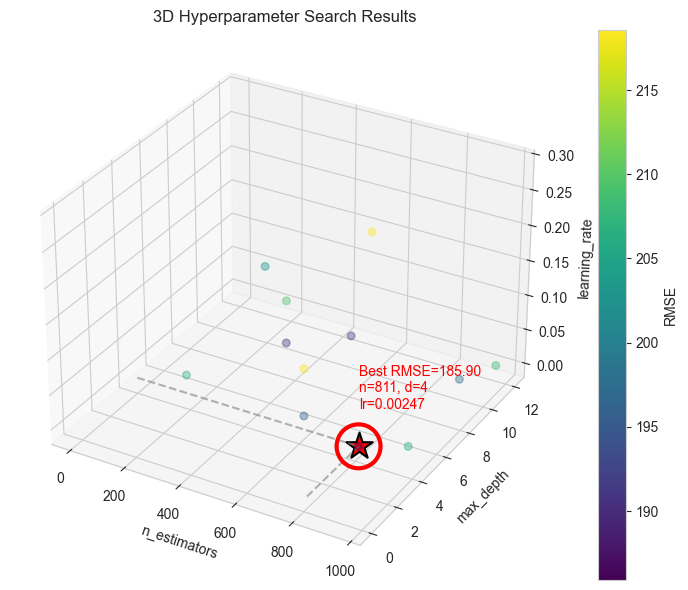

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#
xs   = [t.params["n_estimators"]      for t in study.trials]
ys   = [t.params["max_depth"]         for t in study.trials]
zs   = [t.params["learning_rate"]     for t in study.trials]
vals = [t.value                        for t in study.trials]  # RMSE

#
best = study.best_trial
xb, yb, zb = (best.params["n_estimators"],
              best.params["max_depth"],
              best.params["learning_rate"])
vb = best.value

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection="3d")

#
ax.scatter(xs, ys, zs,
           c=vals, cmap="viridis",
           s=30, alpha=0.4)

#
ax.scatter([xb], [yb], [zb],
           c="red", marker="*", s=400,
           edgecolors="k", linewidths=1.5)

#
ax.scatter([xb], [yb], [zb],
           facecolors='none', edgecolors='red',
           s=1000, linewidths=3)

#
ax.plot([xb, xb], [yb, yb], [0, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([xb, xb], [0, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([0, xb], [yb, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)

#
ax.text(xb, yb, zb + 0.05,
        f"Best RMSE={vb:.2f}\nn={xb}, d={yb}\nlr={zb:.3g}",
        color="red", fontsize=10, ha="left", va="bottom")

#
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("learning_rate")
ax.set_title("3D Hyperparameter Search Results")

mappable = plt.cm.ScalarMappable(cmap="viridis")
mappable.set_array(vals)
fig.colorbar(mappable, ax=ax, label="RMSE")

plt.tight_layout()
plt.savefig("3D_Hyperparameter_Search_Results_2.png", dpi=300)
plt.show()


### 3.1.4 Final_training

In [10]:
# u
best_params = study.best_params
final_model = XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    verbosity=0
)
final_model.fit(X_train, y_train, verbose=False)

#
y_pred = final_model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f"Final Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Final Test RMSE: 55.1042, MAE: 14.8992


## 3.2 Lightgbm

### 3.2.1 baseline model

In [13]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
features = [c for c in train_df.columns if c not in exclude_cols]

X_train, y_train = train_df[features], train_df['lmp_HB_BUSAVG']
X_test,  y_test  = test_df[features],  test_df['lmp_HB_BUSAVG']

#
model = lgb.LGBMRegressor(
    objective='regression',   #
    metric='rmse',            #
    num_leaves=31,            #
    learning_rate=0.05,       #
    n_estimators=500,         #
    subsample=0.8,            #
    colsample_bytree=0.8,     #
    random_state=42
)

#
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='rmse'
)

#
y_pred = model.predict(X_test)

#
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7509
[LightGBM] [Info] Number of data points in the train set: 52349, number of used features: 34
[LightGBM] [Info] Start training from score 42.823374
 MSE:  5044.5218
RMSE: 71.0248
 MAE:  27.7497


### 3.2.2 feature importance

               feature  importance
17        north_y_temp        1221
25           lmp_lag_1        1201
34    lmp_roll_mean_24         855
15           east_temp         852
13           other_gen         804
16       far_west_temp         792
19  south_central_temp         784
9        power_storage         526
7                hydro         466
26           lmp_lag_2         462
12         natural_gas         419
11                wind         413
10               solar         405
20       southern_temp         397
32          lmp_lag_24         373
33          lmp_lag_48         365
6     coal_and_lignite         364
27           lmp_lag_3         339
18  north_central_temp         315
14          coast_temp         312
3          west_x_load         312
31           lmp_lag_7         299
28           lmp_lag_4         285
35    lmp_roll_mean_48         284
0                 hour         270
30           lmp_lag_6         267
21         west_y_temp         198
29           lmp_lag

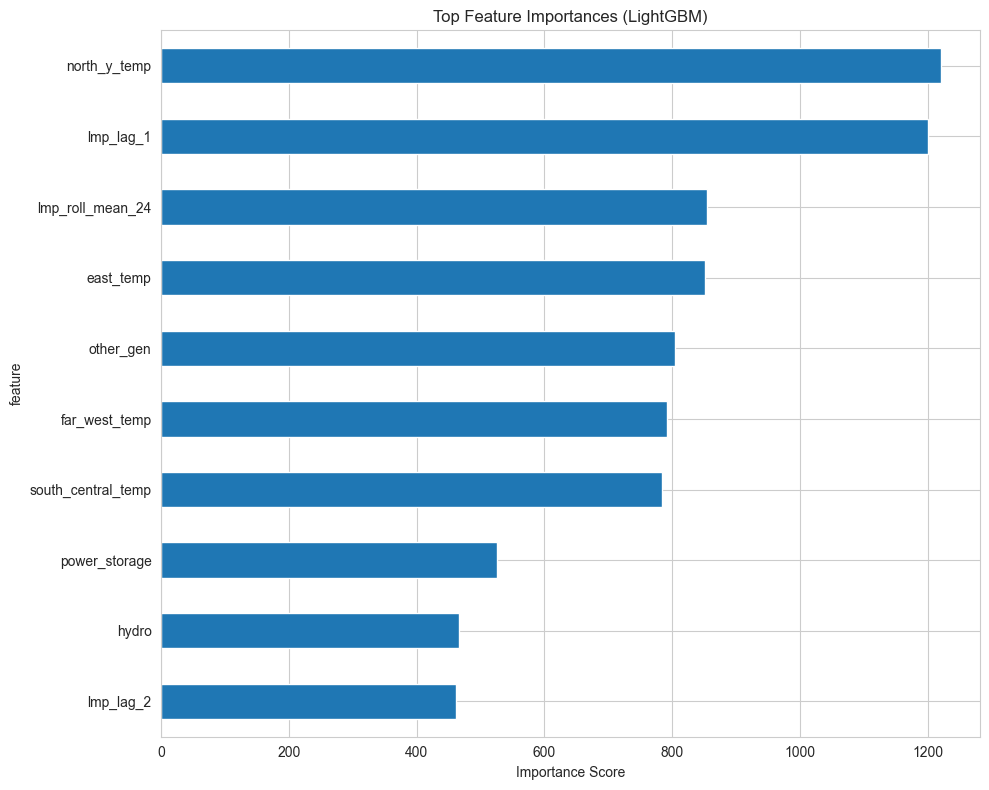

In [12]:
importances = model.feature_importances_

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df)

top_n = 10
importance_df.head(top_n).plot(kind='barh', x='feature', y='importance', figsize=(10, 8), legend=False)
plt.title("Top Feature Importances (LightGBM)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

               feature  importance
9        power_storage  911.091234
34    lmp_roll_mean_24  664.258195
25           lmp_lag_1  485.943275
19  south_central_temp  400.661635
10               solar  258.797121
28           lmp_lag_4  155.459111
3          west_x_load  127.055407
6     coal_and_lignite  106.952893
20       southern_temp  106.898967
31           lmp_lag_7  106.379325
4         houston_load   88.485527
27           lmp_lag_3   87.847218
0                 hour   87.356524
32          lmp_lag_24   87.083261
18  north_central_temp   70.248433
26           lmp_lag_2   61.706991
14          coast_temp   57.706283
12         natural_gas   56.335655
8              nuclear   43.277686
30           lmp_lag_6   34.002528
2           south_load   28.322404
29           lmp_lag_5   24.713701
17        north_y_temp   19.747828
35    lmp_roll_mean_48   19.476111
5           total_load   15.718157
36   lmp_roll_mean_168   15.558308
7                hydro   15.296401
15           east_te

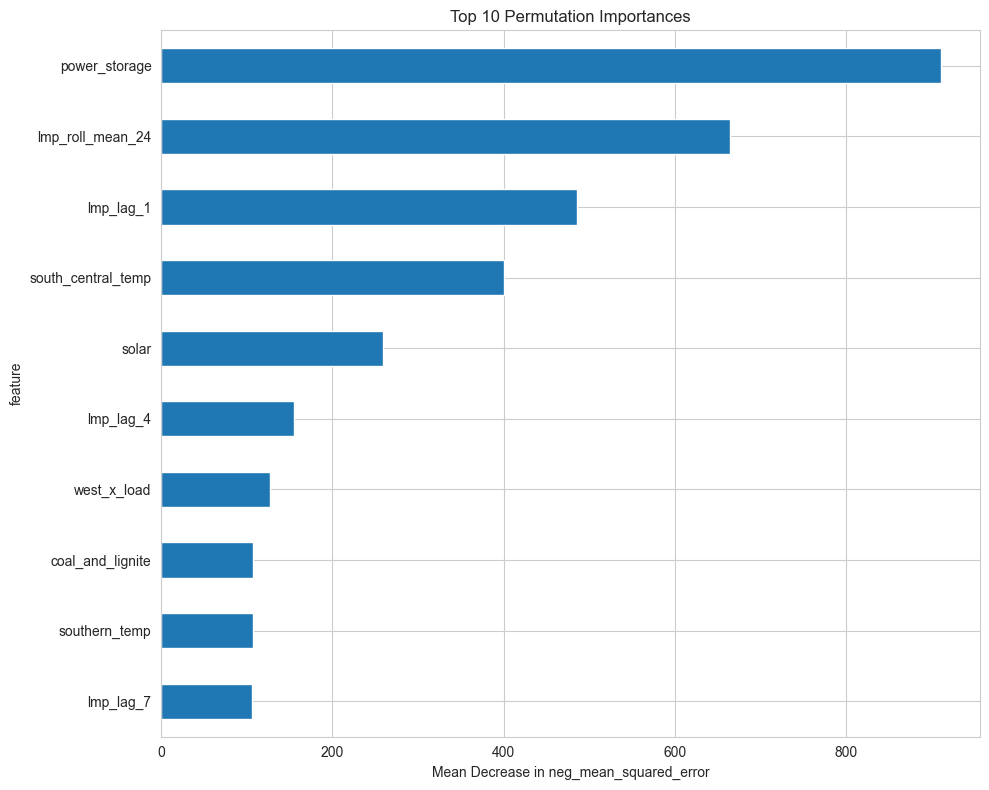

In [13]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# permutation importance
result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error'
)


perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

print(perm_df)


top_n = 10
perm_df.head(top_n).plot(
    kind='barh',
    x='feature',
    y='importance',
    figsize=(10, 8),
    legend=False
)
plt.title(f"Top {top_n} Permutation Importances")
plt.gca().invert_yaxis()
plt.xlabel("Mean Decrease in neg_mean_squared_error")
plt.tight_layout()
plt.show()


### 3.2.3 hyperparameter tuning

In [22]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

--------------------------------------------------------

#
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

#
def objective(trial):
    params = {
        "objective":          "regression",
        "metric":             "rmse",
        "num_leaves":         trial.suggest_int("num_leaves", 20, 150),
        "max_depth":          trial.suggest_int("max_depth", 3, 12),
        "learning_rate":      trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "min_child_samples":  trial.suggest_int("min_child_samples", 5, 100),
        "min_split_gain":     trial.suggest_float("min_split_gain", 0.0, 5.0),
        "subsample":          trial.suggest_float("subsample", 0.5, 1.0),
        "subsample_freq":     trial.suggest_int("subsample_freq", 1, 10),
        "colsample_bytree":   trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha":          trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda":         trial.suggest_float("reg_lambda", 0.0, 5.0),
        #
        "verbosity":          -1,
        "random_state":       42
    }

    fold_rmse = []
    for train_idx, val_idx in tscv.split(X_train):
        #
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        gbm = lgb.LGBMRegressor(**params, n_estimators=1000)
        gbm.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            #
            callbacks=[lgb.log_evaluation(0)]
        )

        preds = gbm.predict(X_val)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val, preds)))

    return float(np.mean(fold_rmse))


#
study = optuna.create_study(direction="minimize", study_name="lgb_lmp_tuning_tsCV")
study.optimize(objective, n_trials=50, timeout=600)

#
print("Best CV RMSE: {:.4f}".format(study.best_value))
print("Best params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")




[I 2025-04-21 10:53:47,342] A new study created in memory with name: lgb_lmp_tuning_tsCV
[I 2025-04-21 10:54:05,002] Trial 0 finished with value: 165.43685584326013 and parameters: {'num_leaves': 22, 'max_depth': 4, 'learning_rate': 0.09026826624234875, 'min_child_samples': 77, 'min_split_gain': 1.8229754804906033, 'subsample': 0.8215141447644669, 'subsample_freq': 9, 'colsample_bytree': 0.7179203877623237, 'reg_alpha': 2.383992388700913, 'reg_lambda': 0.9280554051930878}. Best is trial 0 with value: 165.43685584326013.
[I 2025-04-21 10:54:22,316] Trial 1 finished with value: 167.05891318081487 and parameters: {'num_leaves': 89, 'max_depth': 9, 'learning_rate': 0.03772532747486148, 'min_child_samples': 50, 'min_split_gain': 4.870011513201652, 'subsample': 0.8852539645986217, 'subsample_freq': 4, 'colsample_bytree': 0.6858167868056632, 'reg_alpha': 2.5103175090658327, 'reg_lambda': 3.569265753680649}. Best is trial 0 with value: 165.43685584326013.
[I 2025-04-21 10:54:37,520] Trial 2 fi

Best CV RMSE: 160.9584
Best params:
  num_leaves: 54
  max_depth: 5
  learning_rate: 0.05514660794547158
  min_child_samples: 72
  min_split_gain: 0.5675268504256165
  subsample: 0.9420201818373986
  subsample_freq: 9
  colsample_bytree: 0.6093494459142768
  reg_alpha: 3.068786386945649
  reg_lambda: 1.5592504964430272


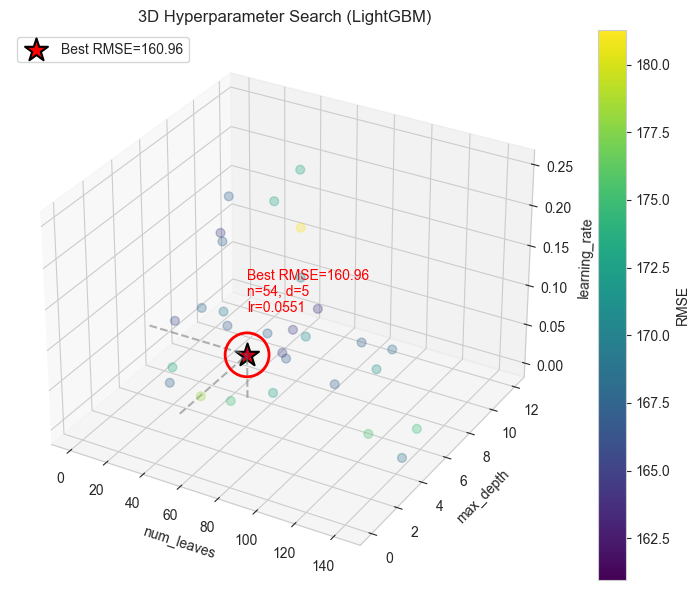

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#
xs   = [t.params["num_leaves"]       for t in study.trials]
ys   = [t.params["max_depth"]        for t in study.trials]
zs   = [t.params["learning_rate"]    for t in study.trials]
vals = [t.value                       for t in study.trials]  # RMSE

#
best = study.best_trial
xb, yb, zb = (
    best.params["num_leaves"],
    best.params["max_depth"],
    best.params["learning_rate"]
)
vb = best.value  #

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection="3d")

#
ax.scatter(xs, ys, zs,
           c=vals,
           cmap="viridis",
           s=40,
           alpha=0.3)

#
ax.scatter([xb], [yb], [zb],
           c="red",
           marker="*",
           s=300,
           edgecolors="k",
           linewidths=1.5,
           label=f"Best RMSE={vb:.2f}")

#
ax.scatter([xb], [yb], [zb],
           facecolors="none",
           edgecolors="red",
           s=1000,
           linewidths=2)

# 4) 投影参考线（可选）
ax.plot([xb, xb], [yb, yb], [0, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([xb, xb], [0, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([0, xb], [yb, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)

#

ax.text(xb, yb, zb + 0.05,
        f"Best RMSE={vb:.2f}\nn={xb}, d={yb}\nlr={zb:.3g}",
        color="red", fontsize=10, ha="left", va="bottom")

#
ax.set_xlabel("num_leaves")
ax.set_ylabel("max_depth")
ax.set_zlabel("learning_rate")
ax.set_title("3D Hyperparameter Search (LightGBM)")

#
mappable = plt.cm.ScalarMappable(cmap="viridis")
mappable.set_array(vals)
fig.colorbar(mappable, ax=ax, label="RMSE")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()


### 3.2.4 Full Training

In [23]:
# 5. 用最优超参在全量训练集上重训练，并在测试集上评估
best_params = study.best_params
final_model = lgb.LGBMRegressor(
    **best_params,
    objective="regression",
    metric="rmse",
    n_estimators=1000,
    verbosity=-1,
    random_state=42
)
final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.log_evaluation(0)]
)

# 测试集评估
y_pred = final_model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
print(f"Final Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Final Test RMSE: 78.4497, MAE: 27.6717


# 4. RNNs

## 4.1 LSTM

### 4.1.1 baseline model

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['lmp_HB_BUSAVG']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['lmp_HB_BUSAVG']])

#
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X, self.y, self.seq_len = X, y, seq_len

    def __len__(self):
        return len(self.X) - self.seq_len

    def __getitem__(self, idx):
        x_seq = self.X[idx:idx+self.seq_len]
        y_seq = self.y[idx+self.seq_len]
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

seq_len = 24
train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)

#
class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size=n_features,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: [batch, seq_len, n_features]
        out, _ = self.lstm(x)         # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]           #
        return self.fc(out)           # [batch, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = LSTMRegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#
n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")


model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred)
        ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))


mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")


C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([37, 1])) that is different to the input size (torch.Size([37])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Train MSE=0.000624
Epoch 2/20, Train MSE=0.000608
Epoch 3/20, Train MSE=0.000604
Epoch 4/20, Train MSE=0.000604
Epoch 5/20, Train MSE=0.000603
Epoch 6/20, Train MSE=0.000601
Epoch 7/20, Train MSE=0.000601
Epoch 8/20, Train MSE=0.000601
Epoch 9/20, Train MSE=0.000601
Epoch 10/20, Train MSE=0.000601
Epoch 11/20, Train MSE=0.000600
Epoch 12/20, Train MSE=0.000600
Epoch 13/20, Train MSE=0.000600
Epoch 14/20, Train MSE=0.000600
Epoch 15/20, Train MSE=0.000600
Epoch 16/20, Train MSE=0.000600
Epoch 17/20, Train MSE=0.000600
Epoch 18/20, Train MSE=0.000599
Epoch 19/20, Train MSE=0.000600
Epoch 20/20, Train MSE=0.000600
 MSE:  5132.8564
RMSE: 71.6440
 MAE:  36.7287


### 4.1.2 hyperparameter tuning

In [6]:
import optuna
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import MinMaxScaler

# 假设 train_df, test_df, feature_cols, X_train_all, y_train_all 已预先定义好
# 以及 LSTMRegressor 类也和之前一致

def get_data_loaders(trial, X, y):
    # 采样序列长度和 batch size
    seq_len    = trial.suggest_int("seq_len", 12, 48, step=12)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    # 构造带滑动窗口的数据集
    dataset = TimeSeriesDataset(X, y, seq_len)
    n_total = len(dataset)
    n_train = int(0.8 * n_total)
    n_val   = n_total - n_train

    train_ds, val_ds = random_split(dataset, [n_train, n_val])
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, seq_len

def objective(trial):
    # 模型结构 & 优化器超参
    hidden_size = trial.suggest_int("hidden_size", 32, 128, step=32)
    num_layers  = trial.suggest_int("num_layers", 1, 3)
    lr          = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    n_epochs    = trial.suggest_int("n_epochs", 5, 20)

    # 根据 seq_len, batch_size 构造 DataLoader
    train_loader, val_loader, seq_len = get_data_loaders(
        trial, X_train_all, y_train_all
    )

    # 实例化模型、优化器、损失
    model     = LSTMRegressor(n_features=len(feature_cols),
                              hidden_size=hidden_size,
                              num_layers=num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # 训练循环
    for epoch in range(n_epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)         # yb 形状为 [batch,1]
            optimizer.zero_grad()
            y_pred = model(xb)                             # y_pred 也是 [batch,1]
            loss   = criterion(y_pred, yb)
            loss.backward()
            optimizer.step()

    # 验证集上评估 MSE
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            y_pred = model(xb)                           # [batch,1]
            val_loss += criterion(y_pred, yb).item() * xb.size(0)

    val_loss /= len(val_loader.dataset)
    return val_loss

# 运行 Optuna 调优
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best MSE:   ", study.best_value)
print("Best params:", study.best_params)


[I 2025-04-20 14:33:38,860] A new study created in memory with name: no-name-b0c6733f-35ff-4b79-83a2-1beef24a16f4
[I 2025-04-20 14:34:54,731] Trial 0 finished with value: 0.00035879113704243633 and parameters: {'hidden_size': 32, 'num_layers': 2, 'lr': 0.00010068317405750659, 'n_epochs': 7, 'seq_len': 12, 'batch_size': 128}. Best is trial 0 with value: 0.00035879113704243633.
[I 2025-04-20 14:39:33,428] Trial 1 finished with value: 0.00019697306986942578 and parameters: {'hidden_size': 96, 'num_layers': 3, 'lr': 0.0013693446966738273, 'n_epochs': 13, 'seq_len': 12, 'batch_size': 128}. Best is trial 1 with value: 0.00019697306986942578.
[I 2025-04-20 14:49:12,571] Trial 2 finished with value: 0.00026754565307050767 and parameters: {'hidden_size': 64, 'num_layers': 3, 'lr': 0.00016294933436801463, 'n_epochs': 15, 'seq_len': 36, 'batch_size': 64}. Best is trial 1 with value: 0.00019697306986942578.
[I 2025-04-20 14:58:14,927] Trial 3 finished with value: 0.0002782907188077296 and paramete

KeyboardInterrupt: 

### 4.1.2 Standardization

In [28]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # force CPU use

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# — assume train_df and test_df are already loaded and preprocessed —

# 1. Select feature columns and target
exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

# 2. Initialize StandardScalers
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# 3. Fit/transform train and transform test
X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['lmp_HB_BUSAVG']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['lmp_HB_BUSAVG']])

# 4. Dataset for sequences
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X, self.y, self.seq_len = X, y, seq_len
    def __len__(self):
        return len(self.X) - self.seq_len
    def __getitem__(self, idx):
        seq_x = self.X[idx : idx + self.seq_len]
        seq_y = self.y[idx + self.seq_len]
        return torch.FloatTensor(seq_x), torch.FloatTensor(seq_y)

seq_len = 24
train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)

# 5. GRU model
class GRURegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.gru = nn.GRU(input_size=n_features,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True)
        self.fc  = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, _ = self.gru(x)            # [batch, seq_len, hidden_size]
        out     = out[:, -1, :]         # take last time step
        return self.fc(out)             # [batch, 1]

device = torch.device('cpu')
model  = GRURegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 6. Training loop
n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb).squeeze(1)
        loss  = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")

# 7. Evaluation
model.eval()
all_preds, all_trues = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        preds = model(xb).squeeze(1).cpu().numpy()
        all_preds.append(preds)
        all_trues.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(all_trues).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(all_preds).reshape(-1,1))

mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")


C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([37, 1])) that is different to the input size (torch.Size([37])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Train MSE=1.001506
Epoch 2/20, Train MSE=1.000933
Epoch 3/20, Train MSE=1.000788
Epoch 4/20, Train MSE=1.000645
Epoch 5/20, Train MSE=1.000575
Epoch 6/20, Train MSE=1.000491
Epoch 7/20, Train MSE=1.000567
Epoch 8/20, Train MSE=1.000455
Epoch 9/20, Train MSE=1.000593
Epoch 10/20, Train MSE=1.000489
Epoch 11/20, Train MSE=1.000509
Epoch 12/20, Train MSE=1.000449
Epoch 13/20, Train MSE=1.000524
Epoch 14/20, Train MSE=1.000502
Epoch 15/20, Train MSE=1.000442
Epoch 16/20, Train MSE=1.000439
Epoch 17/20, Train MSE=1.000433
Epoch 18/20, Train MSE=1.000473
Epoch 19/20, Train MSE=1.000404
Epoch 20/20, Train MSE=1.000446
Test MSE:  4525.3906
Test RMSE: 67.2710
Test MAE:  23.4316


## 4.2 GRU

In [17]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['lmp_HB_BUSAVG']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['lmp_HB_BUSAVG']])

#
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X, self.y, self.seq_len = X, y, seq_len

    def __len__(self):
        return len(self.X) - self.seq_len

    def __getitem__(self, idx):
        x_seq = self.X[idx:idx+self.seq_len]
        y_seq = self.y[idx+self.seq_len]
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

seq_len = 24
train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)

#
class GRURegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.gru = nn.GRU(input_size=n_features,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]
        return self.fc(out)

device = torch.device('cpu')
model  = GRURegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#
n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")

#
model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred)
        ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))

#
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")

C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([37, 1])) that is different to the input size (torch.Size([37])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Train MSE=0.000699
Epoch 2/20, Train MSE=0.000626
Epoch 3/20, Train MSE=0.000619
Epoch 4/20, Train MSE=0.000619
Epoch 5/20, Train MSE=0.000612
Epoch 6/20, Train MSE=0.000613
Epoch 7/20, Train MSE=0.000606
Epoch 8/20, Train MSE=0.000607
Epoch 9/20, Train MSE=0.000606
Epoch 10/20, Train MSE=0.000603
Epoch 11/20, Train MSE=0.000604
Epoch 12/20, Train MSE=0.000602
Epoch 13/20, Train MSE=0.000601
Epoch 14/20, Train MSE=0.000602
Epoch 15/20, Train MSE=0.000601
Epoch 16/20, Train MSE=0.000601
Epoch 17/20, Train MSE=0.000601
Epoch 18/20, Train MSE=0.000601
Epoch 19/20, Train MSE=0.000600
Epoch 20/20, Train MSE=0.000600
测试集 MSE:  5094.9971
测试集 RMSE: 71.3792
测试集 MAE:  36.2598


# 5. day-ahead forecasting

## 5.1 xgboost

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#
df = pd.read_csv('all_hourly_data.csv')
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'], utc=True)

#
df['day_of_week']  = df['interval_start_local'].dt.dayofweek
df['day_of_month'] = df['interval_start_local'].dt.day
df['month']        = df['interval_start_local'].dt.month

#
for lag in [1, 2, 3, 24, 48]:
    df[f'lmp_lag_{lag}'] = df['lmp_HB_BUSAVG'].shift(lag)

#
df['lmp_roll_mean_24']  = df['lmp_HB_BUSAVG'].rolling(24).mean()
df['lmp_roll_mean_48']  = df['lmp_HB_BUSAVG'].rolling(48).mean()
df['lmp_roll_mean_168'] = df['lmp_HB_BUSAVG'].rolling(168).mean()


df['target_24h'] = df['lmp_HB_BUSAVG'].shift(-24)


df = df.dropna().reset_index(drop=True)


train_start = pd.Timestamp('2018-01-08 06:00:00+0000', tz='UTC')
train_end   = pd.Timestamp('2023-12-31 23:59:59+0000', tz='UTC')
test_start  = pd.Timestamp('2024-01-01 00:00:00+0000', tz='UTC')
test_end    = pd.Timestamp('2025-04-13 04:00:00+0000', tz='UTC')

mask_train = (df['interval_start_local'] >= train_start) & (df['interval_start_local'] <= train_end)
mask_test  = (df['interval_start_local'] >= test_start)  & (df['interval_start_local'] <= test_end)

train_df = df.loc[mask_train].reset_index(drop=True)
test_df  = df.loc[mask_test].reset_index(drop=True)


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG', 'target_24h']
features = [c for c in train_df.columns if c not in exclude_cols]
X_train, y_train = train_df[features], train_df['target_24h']
X_test,  y_test  = test_df[features],  test_df['target_24h']


model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

#
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=10
)

#
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")


[0]	validation_0-rmse:218.18654	validation_1-rmse:68.09204
[10]	validation_0-rmse:160.97245	validation_1-rmse:75.67509
[20]	validation_0-rmse:127.01111	validation_1-rmse:82.47967
[30]	validation_0-rmse:105.91767	validation_1-rmse:94.93564
[40]	validation_0-rmse:93.66388	validation_1-rmse:100.55895
[50]	validation_0-rmse:85.60715	validation_1-rmse:109.06024
[60]	validation_0-rmse:80.39228	validation_1-rmse:123.72960
[70]	validation_0-rmse:76.14702	validation_1-rmse:145.55817
[80]	validation_0-rmse:73.13245	validation_1-rmse:156.43939
[90]	validation_0-rmse:70.26159	validation_1-rmse:157.85562
[100]	validation_0-rmse:68.21762	validation_1-rmse:164.50849
[110]	validation_0-rmse:66.02132	validation_1-rmse:175.61931
[120]	validation_0-rmse:64.21411	validation_1-rmse:181.39679
[130]	validation_0-rmse:62.56091	validation_1-rmse:181.92447
[140]	validation_0-rmse:60.72086	validation_1-rmse:183.95826
[150]	validation_0-rmse:59.22621	validation_1-rmse:187.64042
[160]	validation_0-rmse:57.84028	va

## 5.2 lightgbm

In [9]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('all_hourly_data.csv')
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'], utc=True)

#
df['day_of_week']  = df['interval_start_local'].dt.dayofweek
df['day_of_month'] = df['interval_start_local'].dt.day
df['month']        = df['interval_start_local'].dt.month

#
for lag in [1, 2, 3, 24, 48]:
    df[f'lmp_lag_{lag}'] = df['lmp_HB_BUSAVG'].shift(lag)

#
df['lmp_roll_mean_24']  = df['lmp_HB_BUSAVG'].rolling(24).mean()
df['lmp_roll_mean_48']  = df['lmp_HB_BUSAVG'].rolling(48).mean()
df['lmp_roll_mean_168'] = df['lmp_HB_BUSAVG'].rolling(168).mean()


df['target_24h'] = df['lmp_HB_BUSAVG'].shift(-24)


df = df.dropna().reset_index(drop=True)


train_start = pd.Timestamp('2018-01-08 06:00:00+0000', tz='UTC')
train_end   = pd.Timestamp('2023-12-31 23:59:59+0000', tz='UTC')
test_start  = pd.Timestamp('2024-01-01 00:00:00+0000', tz='UTC')
test_end    = pd.Timestamp('2025-04-13 04:00:00+0000', tz='UTC')

mask_train = (df['interval_start_local'] >= train_start) & (df['interval_start_local'] <= train_end)
mask_test  = (df['interval_start_local'] >= test_start)  & (df['interval_start_local'] <= test_end)

train_df = df.loc[mask_train].reset_index(drop=True)
test_df  = df.loc[mask_test].reset_index(drop=True)


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG', 'target_24h']
features = [c for c in train_df.columns if c not in exclude_cols]
X_train, y_train = train_df[features], train_df['target_24h']
X_test,  y_test  = test_df[features],  test_df['target_24h']

#
model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

#
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='rmse'
)

#
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7254
[LightGBM] [Info] Number of data points in the train set: 52349, number of used features: 33
[LightGBM] [Info] Start training from score 42.826536
24h 预测 — 测试集 MSE:  20723.2600
24h 预测 — 测试集 RMSE: 143.9558
24h 预测 — 测试集 MAE:  56.6976


## 5.3 LSTM

In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


df = pd.read_csv('all_hourly_data.csv')
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'], utc=True)


df['day_of_week']  = df['interval_start_local'].dt.dayofweek
df['day_of_month'] = df['interval_start_local'].dt.day
df['month']        = df['interval_start_local'].dt.month

for lag in [1, 2, 3, 24, 48]:
    df[f'lmp_lag_{lag}'] = df['lmp_HB_BUSAVG'].shift(lag)

df['lmp_roll_mean_24']  = df['lmp_HB_BUSAVG'].rolling(24).mean()
df['lmp_roll_mean_48']  = df['lmp_HB_BUSAVG'].rolling(48).mean()
df['lmp_roll_mean_168'] = df['lmp_HB_BUSAVG'].rolling(168).mean()


df['target_24h'] = df['lmp_HB_BUSAVG'].shift(-24)

df = df.dropna().reset_index(drop=True)


train_start = pd.Timestamp('2018-01-08 06:00:00+0000', tz='UTC')
train_end   = pd.Timestamp('2023-12-31 23:59:59+0000', tz='UTC')
test_start  = pd.Timestamp('2024-01-01 00:00:00+0000', tz='UTC')
test_end    = pd.Timestamp('2025-04-13 04:00:00+0000', tz='UTC')

mask_train = (df['interval_start_local'] >= train_start) & (df['interval_start_local'] <= train_end)
mask_test  = (df['interval_start_local'] >= test_start)  & (df['interval_start_local'] <= test_end)

train_df = df.loc[mask_train].reset_index(drop=True)
test_df  = df.loc[mask_test].reset_index(drop=True)


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG', 'target_24h']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['target_24h']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['target_24h']])


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X, self.y, self.seq_len = X, y, seq_len

    def __len__(self):
        return len(self.X) - self.seq_len

    def __getitem__(self, idx):
        x_seq = self.X[idx:idx+self.seq_len]
        y_seq = self.y[idx+self.seq_len]
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

seq_len = 24
train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)


class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size=n_features,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out)

device = torch.device('cpu')
model  = LSTMRegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")


model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred)
        ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))

mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")


C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([37, 1])) that is different to the input size (torch.Size([37])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Train MSE=0.000629
Epoch 2/20, Train MSE=0.000610
Epoch 3/20, Train MSE=0.000607
Epoch 4/20, Train MSE=0.000605
Epoch 5/20, Train MSE=0.000603
Epoch 6/20, Train MSE=0.000602
Epoch 7/20, Train MSE=0.000601
Epoch 8/20, Train MSE=0.000600
Epoch 9/20, Train MSE=0.000600
Epoch 10/20, Train MSE=0.000600
Epoch 11/20, Train MSE=0.000600
Epoch 12/20, Train MSE=0.000600
Epoch 13/20, Train MSE=0.000600
Epoch 14/20, Train MSE=0.000600
Epoch 15/20, Train MSE=0.000599
Epoch 16/20, Train MSE=0.000599
Epoch 17/20, Train MSE=0.000600
Epoch 18/20, Train MSE=0.000599
Epoch 19/20, Train MSE=0.000599
Epoch 20/20, Train MSE=0.000600
24h 预测 — 测试集 MSE:  4689.6997
24h 预测 — 测试集 RMSE: 68.4814
24h 预测 — 测试集 MAE:  28.1741


## 5.4 GRU

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


df = pd.read_csv('all_hourly_data.csv')
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'], utc=True)


df['day_of_week']  = df['interval_start_local'].dt.dayofweek
df['day_of_month'] = df['interval_start_local'].dt.day
df['month']        = df['interval_start_local'].dt.month


for lag in [1, 2, 3, 24, 48]:
    df[f'lmp_lag_{lag}'] = df['lmp_HB_BUSAVG'].shift(lag)
df['lmp_roll_mean_24']  = df['lmp_HB_BUSAVG'].rolling(24).mean()
df['lmp_roll_mean_48']  = df['lmp_HB_BUSAVG'].rolling(48).mean()
df['lmp_roll_mean_168'] = df['lmp_HB_BUSAVG'].rolling(168).mean()


df['target_24h'] = df['lmp_HB_BUSAVG'].shift(-24)

df = df.dropna().reset_index(drop=True)
train_start = pd.Timestamp('2018-01-08 06:00:00+0000', tz='UTC')
train_end   = pd.Timestamp('2023-12-31 23:59:59+0000', tz='UTC')
test_start  = pd.Timestamp('2024-01-01 00:00:00+0000', tz='UTC')
test_end    = pd.Timestamp('2025-04-13 04:00:00+0000', tz='UTC')
mask_train = (df['interval_start_local'] >= train_start) & (df['interval_start_local'] <= train_end)
mask_test  = (df['interval_start_local'] >= test_start)  & (df['interval_start_local'] <= test_end)
train_df = df.loc[mask_train].reset_index(drop=True)
test_df  = df.loc[mask_test].reset_index(drop=True)


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG', 'target_24h']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]
scaler_x = MinMaxScaler(); scaler_y = MinMaxScaler()
X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['target_24h']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['target_24h']])


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X, self.y, self.seq_len = X, y, seq_len
    def __len__(self):
        return len(self.X) - self.seq_len
    def __getitem__(self, idx):
        x_seq = self.X[idx:idx+self.seq_len]
        y_seq = self.y[idx+self.seq_len]
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

seq_len = 24
train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)


class GRURegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.gru = nn.GRU(input_size=n_features,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True)
        self.fc  = nn.Linear(hidden_size, 1)
    def forward(self, x):
        # x: [batch, seq_len, n_features]
        out, _ = self.gru(x)       # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]        #
        return self.fc(out)        # [batch,1]

device = torch.device('cpu')
model  = GRURegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")


model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred); ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))


mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")


C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\New Duke\5. Courses\STA 663\CS 61A\CS61A\venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([37, 1])) that is different to the input size (torch.Size([37])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Train MSE=0.000727
Epoch 2/20, Train MSE=0.000633
Epoch 3/20, Train MSE=0.000622
Epoch 4/20, Train MSE=0.000617
Epoch 5/20, Train MSE=0.000613
Epoch 6/20, Train MSE=0.000611
Epoch 7/20, Train MSE=0.000609
Epoch 8/20, Train MSE=0.000606
Epoch 9/20, Train MSE=0.000608
Epoch 10/20, Train MSE=0.000606
Epoch 11/20, Train MSE=0.000605
Epoch 12/20, Train MSE=0.000605
Epoch 13/20, Train MSE=0.000604
Epoch 14/20, Train MSE=0.000603
Epoch 15/20, Train MSE=0.000604
Epoch 16/20, Train MSE=0.000602
Epoch 17/20, Train MSE=0.000604
Epoch 18/20, Train MSE=0.000602
Epoch 19/20, Train MSE=0.000602
Epoch 20/20, Train MSE=0.000601
24h 预测 — 测试集 MSE:  4504.5312
24h 预测 — 测试集 RMSE: 67.1158
24h 预测 — 测试集 MAE:  22.2012


# 1-week ahead 
Updated from the day-ahead code and then implemented rolling-window validation 

### Feature engineering for the 1-week window

In [1]:
#copy and pasted from Zixiao's new version (to try to get this to run properly)

import pandas as pd
import numpy as np

#
df = pd.read_csv('all_hourly_data.csv')
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'], utc=True)


df['hour']         = df['interval_start_local'].dt.hour
df['day_of_week']  = df['interval_start_local'].dt.dayofweek
df['day_of_month'] = df['interval_start_local'].dt.day
df['month']        = df['interval_start_local'].dt.month

#
df['hour_sin'] = np.sin(2 * np.pi * df['hour']        / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']        / 24)
df['dow_sin']  = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos']  = np.cos(2 * np.pi * df['day_of_week'] / 7)

#
for lag in [1, 2, 3, 24, 48, 168]:
    df[f'lmp_lag_{lag}'] = df['lmp_HB_BUSAVG'].shift(lag)

# 
df['lmp_roll_mean_24']  = df['lmp_HB_BUSAVG'].rolling(24).mean()
df['lmp_roll_mean_48']  = df['lmp_HB_BUSAVG'].rolling(48).mean()
df['lmp_roll_mean_168'] = df['lmp_HB_BUSAVG'].rolling(168).mean()

#
df['target_1w'] = df['lmp_HB_BUSAVG'].shift(-168)


df = df.dropna().reset_index(drop=True)

### Train-test window

In [2]:
#copy and pasted from Zixiao's new version (to try to get this to run properly)

train_start = pd.Timestamp('2018-01-08 06:00:00+0000', tz='UTC')
train_end   = pd.Timestamp('2023-12-31 23:59:59+0000', tz='UTC')
test_start  = pd.Timestamp('2024-01-01 00:00:00+0000', tz='UTC')
test_end    = pd.Timestamp('2025-04-13 04:00:00+0000', tz='UTC')

mask_train = (df['interval_start_local'] >= train_start) & (df['interval_start_local'] <= train_end)
mask_test  = (df['interval_start_local'] >= test_start)  & (df['interval_start_local'] <= test_end)

train_df = df.loc[mask_train].reset_index(drop=True)
test_df  = df.loc[mask_test].reset_index(drop=True)

## 6.1 xgboost

 MSE:  37069.4879
RMSE: 192.5344
 MAE:  85.4540


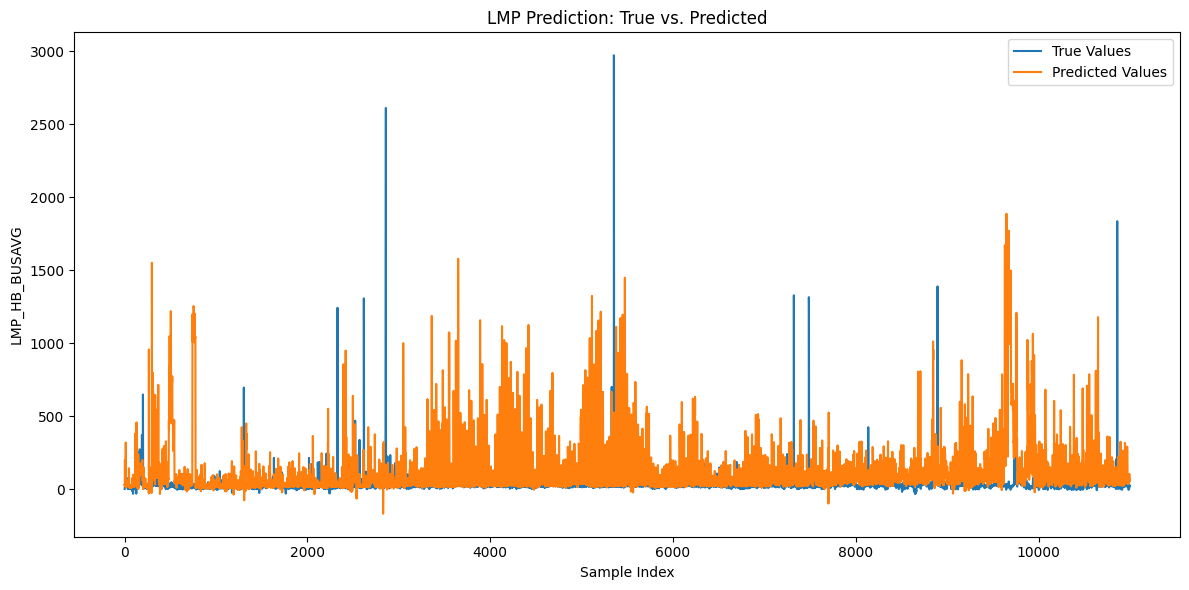

In [ ]:
#copy and pasted from Zixiao's new version (to try to get this to run properly)

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG', 'target_1w']
features = [c for c in train_df.columns if c not in exclude_cols]
X_train, y_train = train_df[features], train_df['target_1w']
X_test,  y_test  = test_df[features],  test_df['target_1w']


model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

#
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

#
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred,         label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('LMP_HB_BUSAVG')
plt.title('LMP Prediction: True vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()

Feature importance

               feature  importance
22         day_of_week    0.168489
24               month    0.085219
23        day_of_month    0.068955
30    lmp_roll_mean_24    0.050796
8              nuclear    0.037501
14          coast_temp    0.036334
20       southern_temp    0.033276
11                wind    0.033248
12         natural_gas    0.032535
19  south_central_temp    0.032279
31    lmp_roll_mean_48    0.029595
2           south_load    0.026841
15           east_temp    0.026837
1         north_x_load    0.026056
18  north_central_temp    0.025173
6     coal_and_lignite    0.020982
17        north_y_temp    0.020677
4         houston_load    0.020246
3          west_x_load    0.018995
32   lmp_roll_mean_168    0.018335
28          lmp_lag_24    0.018230
16       far_west_temp    0.017969
5           total_load    0.017816
13           other_gen    0.017506
25           lmp_lag_1    0.015915
7                hydro    0.015189
9        power_storage    0.014986
27           lmp_lag

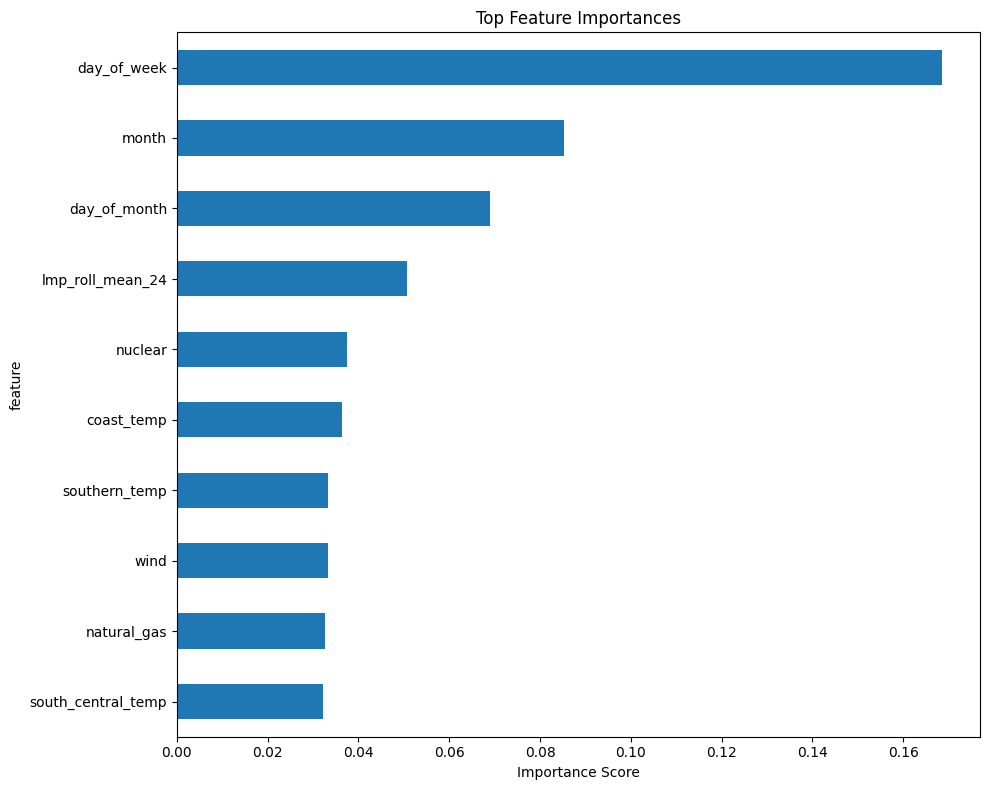

In [17]:
importances = model.feature_importances_

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df)

# Plot top 10
top_n = 10
importance_df.head(top_n).plot(kind='barh', x='feature', y='importance', figsize=(10, 8), legend=False)
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

               feature     importance
17        north_y_temp  107124.229352
1         north_x_load   53890.335725
19  south_central_temp   45101.906375
16       far_west_temp   35711.551381
24               month   34359.783796
8              nuclear   31869.469641
31    lmp_roll_mean_48   26208.968802
18  north_central_temp   17716.224288
14          coast_temp   16585.023024
2           south_load   14111.226372
20       southern_temp   12098.317043
30    lmp_roll_mean_24   11957.967372
21         west_y_temp    8530.710198
5           total_load    7585.594874
6     coal_and_lignite    7515.643553
15           east_temp    6187.730694
12         natural_gas    4221.209231
4         houston_load    2716.144405
25           lmp_lag_1    1302.649345
28          lmp_lag_24    1282.613585
10               solar    1124.156602
22         day_of_week    1083.176807
26           lmp_lag_2     689.746219
11                wind     493.296943
32   lmp_roll_mean_168     265.410685
7           

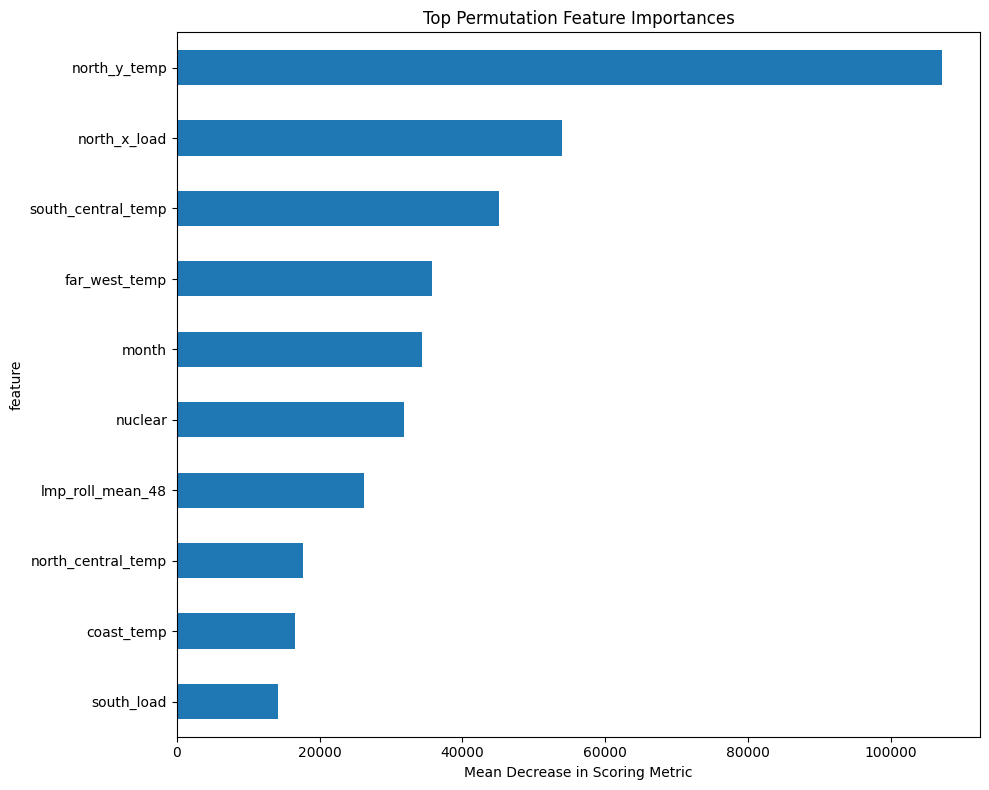

In [18]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt


result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error'
)


perm_df = pd.DataFrame({
    'feature': X_test.columns,

    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)


print(perm_df)


top_n = 10
perm_df.head(top_n).plot(
    kind='barh',
    x='feature',
    y='importance',
    figsize=(10, 8),
    legend=False
)
plt.title("Top Permutation Feature Importances")
plt.gca().invert_yaxis()
plt.xlabel("Mean Decrease in Scoring Metric")
plt.tight_layout()
plt.show()


## Hyperparameter tuning

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import optuna

#
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

#
def objective(trial):
    params = {
        "n_estimators":    trial.suggest_int("n_estimators", 100, 1000),
        "max_depth":       trial.suggest_int("max_depth", 3, 12),
        "learning_rate":   trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "subsample":       trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree":trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma":           trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha":       trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda":      trial.suggest_float("reg_lambda", 0.0, 5.0),
        "verbosity":       0,
        "random_state":    42,
        "objective":       "reg:squarederror",
        "eval_metric":     "rmse"
    }

    fold_rmse = []
    for train_idx, val_idx in tscv.split(X_train):
        #
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = XGBRegressor(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        preds = model.predict(X_val)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val, preds)))

    return float(np.mean(fold_rmse))

#
study = optuna.create_study(
    direction="minimize",
    study_name="xgb_lmp_tuning_tsCV"
)
study.optimize(objective, n_trials=50, timeout=600)

#
print("Best CV RMSE: {:.4f}".format(study.best_value))
print("Best Params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

[I 2025-04-25 12:55:11,417] A new study created in memory with name: xgb_lmp_tuning_tsCV
[I 2025-04-25 12:55:23,493] Trial 0 finished with value: 241.19703701856113 and parameters: {'n_estimators': 391, 'max_depth': 12, 'learning_rate': 0.03542260772509208, 'subsample': 0.6350426183010407, 'colsample_bytree': 0.6626794280804875, 'gamma': 3.588000941060248, 'reg_alpha': 0.8947478537606013, 'reg_lambda': 1.4084789591524982}. Best is trial 0 with value: 241.19703701856113.
[I 2025-04-25 12:55:30,505] Trial 1 finished with value: 235.02887140537746 and parameters: {'n_estimators': 677, 'max_depth': 7, 'learning_rate': 0.025702326906601146, 'subsample': 0.8773145054509317, 'colsample_bytree': 0.6703633525017738, 'gamma': 3.2486890883018726, 'reg_alpha': 1.97794601802112, 'reg_lambda': 4.710792650285292}. Best is trial 1 with value: 235.02887140537746.
[I 2025-04-25 12:56:04,678] Trial 2 finished with value: 245.31397145860646 and parameters: {'n_estimators': 893, 'max_depth': 12, 'learning_

Best CV RMSE: 227.0059
Best Params:
  n_estimators: 771
  max_depth: 5
  learning_rate: 0.0019392580912595712
  subsample: 0.7682689467984742
  colsample_bytree: 0.5072852548711133
  gamma: 2.5962075535715385
  reg_alpha: 2.5846766938774546
  reg_lambda: 4.1468460445787185


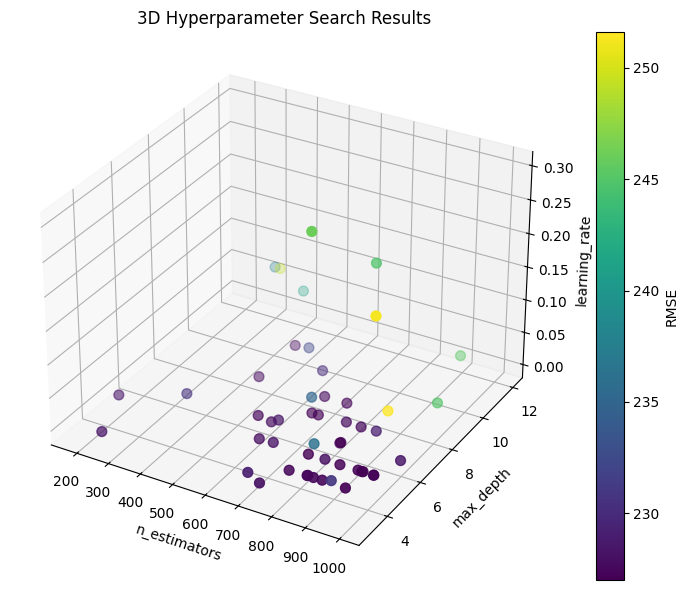

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#
xs = [t.params["n_estimators"]     for t in study.trials]
ys = [t.params["max_depth"]        for t in study.trials]
zs = [t.params["learning_rate"]    for t in study.trials]
vals = [t.value                     for t in study.trials]  # RMSE

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection="3d")
sc  = ax.scatter(xs, ys, zs, c=vals, cmap="viridis", s=50)
fig.colorbar(sc, ax=ax, label="RMSE")

ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("learning_rate")
ax.set_title("3D Hyperparameter Search Results")

plt.tight_layout()
plt.savefig("3D_Hyperparameter_Search_Results.png", dpi=300)
plt.show()


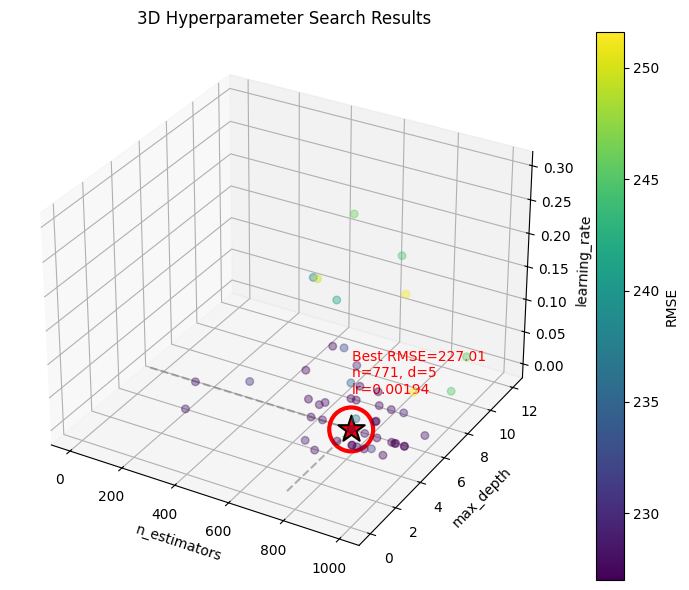

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#
xs   = [t.params["n_estimators"]      for t in study.trials]
ys   = [t.params["max_depth"]         for t in study.trials]
zs   = [t.params["learning_rate"]     for t in study.trials]
vals = [t.value                        for t in study.trials]  # RMSE

#
best = study.best_trial
xb, yb, zb = (best.params["n_estimators"],
              best.params["max_depth"],
              best.params["learning_rate"])
vb = best.value

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection="3d")

#
ax.scatter(xs, ys, zs,
           c=vals, cmap="viridis",
           s=30, alpha=0.4)

#
ax.scatter([xb], [yb], [zb],
           c="red", marker="*", s=400,
           edgecolors="k", linewidths=1.5)

#
ax.scatter([xb], [yb], [zb],
           facecolors='none', edgecolors='red',
           s=1000, linewidths=3)

#
ax.plot([xb, xb], [yb, yb], [0, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([xb, xb], [0, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([0, xb], [yb, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)

#
ax.text(xb, yb, zb + 0.05,
        f"Best RMSE={vb:.2f}\nn={xb}, d={yb}\nlr={zb:.3g}",
        color="red", fontsize=10, ha="left", va="bottom")

#
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("learning_rate")
ax.set_title("3D Hyperparameter Search Results")

mappable = plt.cm.ScalarMappable(cmap="viridis")
mappable.set_array(vals)
fig.colorbar(mappable, ax=ax, label="RMSE")

plt.tight_layout()
plt.savefig("3D_Hyperparameter_Search_Results_2.png", dpi=300)
plt.show()


In [22]:
# u
best_params = study.best_params
final_model = XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    verbosity=0
)
final_model.fit(X_train, y_train, verbose=False)

#
y_pred = final_model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f"Final Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Final Test RMSE: 77.1679, MAE: 29.9706


## 6.2 lightgbm

### Baseline model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7563
[LightGBM] [Info] Number of data points in the train set: 52349, number of used features: 38
[LightGBM] [Info] Start training from score 42.839973
 MSE:  34083.9531
RMSE: 184.6184
 MAE:  85.6927


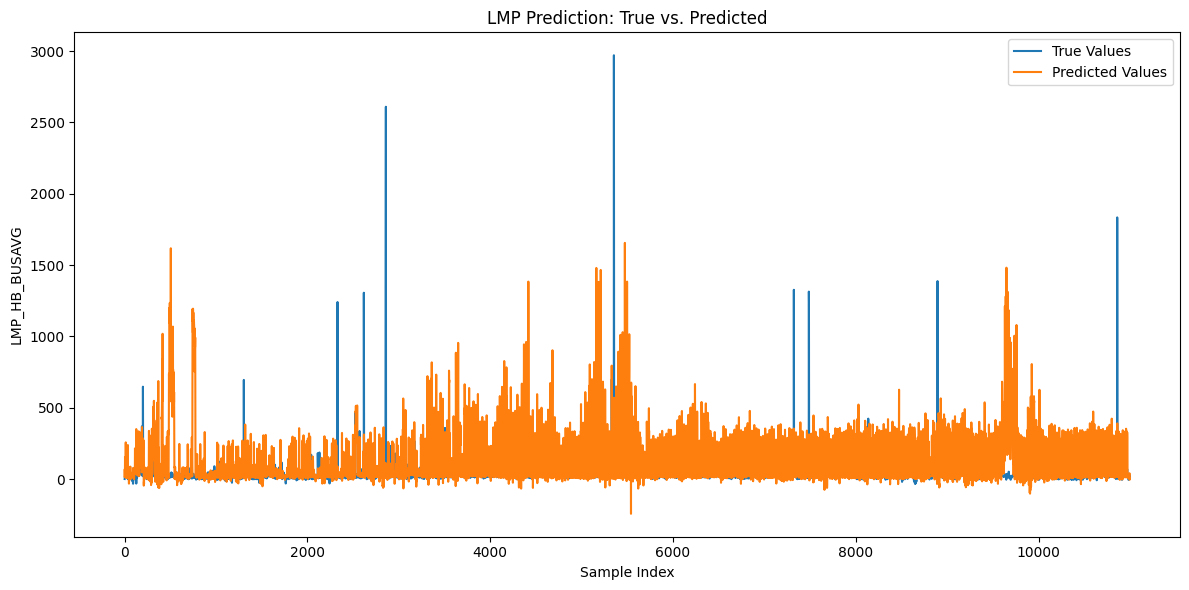

In [ ]:
#copy and pasted from Zixiao's new version (to try to get this to run properly)

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG', 'target_1w']
features = [c for c in train_df.columns if c not in exclude_cols]
X_train, y_train = train_df[features], train_df['target_1w']
X_test,  y_test  = test_df[features],  test_df['target_1w']

#
model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

#
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='rmse'
)

#
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred,         label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('LMP_HB_BUSAVG')
plt.title('LMP Prediction: True vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()
     

               feature  importance
17        north_y_temp        1040
29          lmp_lag_48         695
14          coast_temp         668
15           east_temp         625
23        day_of_month         613
6     coal_and_lignite         592
20       southern_temp         575
30    lmp_roll_mean_24         574
28          lmp_lag_24         571
31    lmp_roll_mean_48         556
12         natural_gas         515
11                wind         509
9        power_storage         496
8              nuclear         486
32   lmp_roll_mean_168         477
16       far_west_temp         450
7                hydro         433
19  south_central_temp         426
18  north_central_temp         413
2           south_load         405
13           other_gen         399
25           lmp_lag_1         380
27           lmp_lag_3         372
10               solar         366
1         north_x_load         336
21         west_y_temp         328
4         houston_load         318
3          west_x_lo

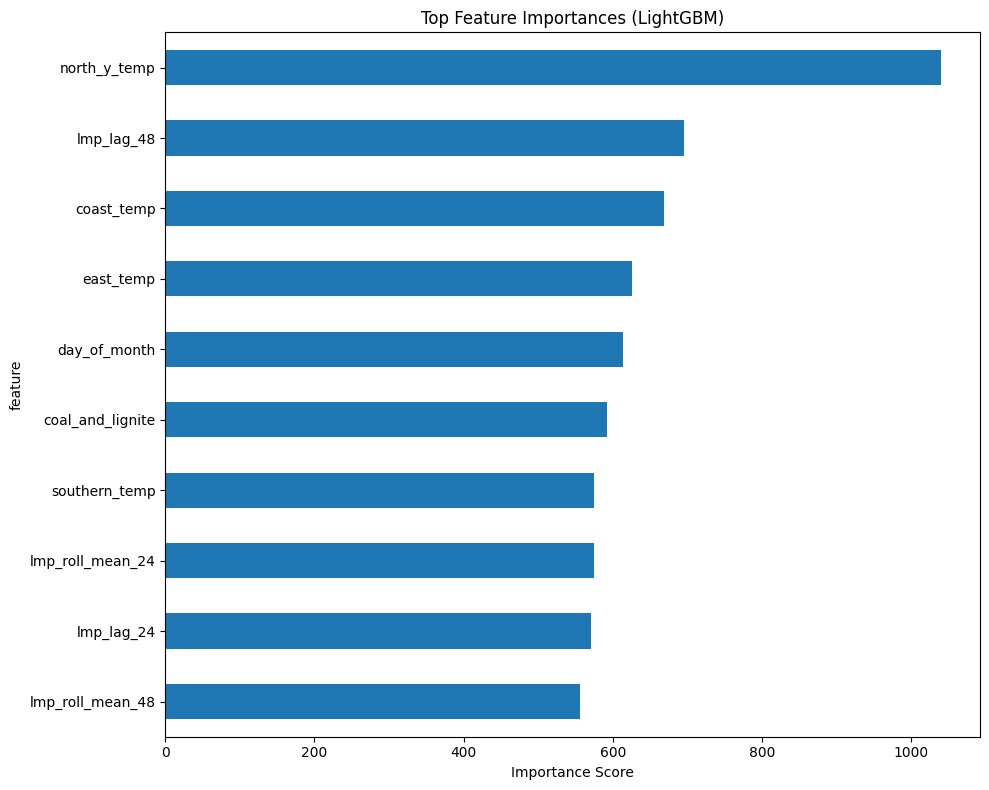

In [24]:
importances = model.feature_importances_

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df)

top_n = 10
importance_df.head(top_n).plot(kind='barh', x='feature', y='importance', figsize=(10, 8), legend=False)
plt.title("Top Feature Importances (LightGBM)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

               feature    importance
24               month  35992.981427
1         north_x_load  30838.169575
31    lmp_roll_mean_48  20972.658410
17        north_y_temp  16745.881489
8              nuclear  15583.907243
16       far_west_temp   9448.682251
30    lmp_roll_mean_24   9113.642655
20       southern_temp   5644.036318
19  south_central_temp   5531.116591
2           south_load   5235.669417
21         west_y_temp   4821.498764
18  north_central_temp   4162.354058
15           east_temp   3010.800574
14          coast_temp   2900.194615
12         natural_gas   2199.373874
6     coal_and_lignite   1699.911803
22         day_of_week   1588.585306
5           total_load   1018.282944
27           lmp_lag_3    523.785094
28          lmp_lag_24    474.132830
23        day_of_month    410.720535
32   lmp_roll_mean_168    350.643380
10               solar    307.794618
25           lmp_lag_1    247.420018
3          west_x_load    145.722861
11                wind    115.418284
2

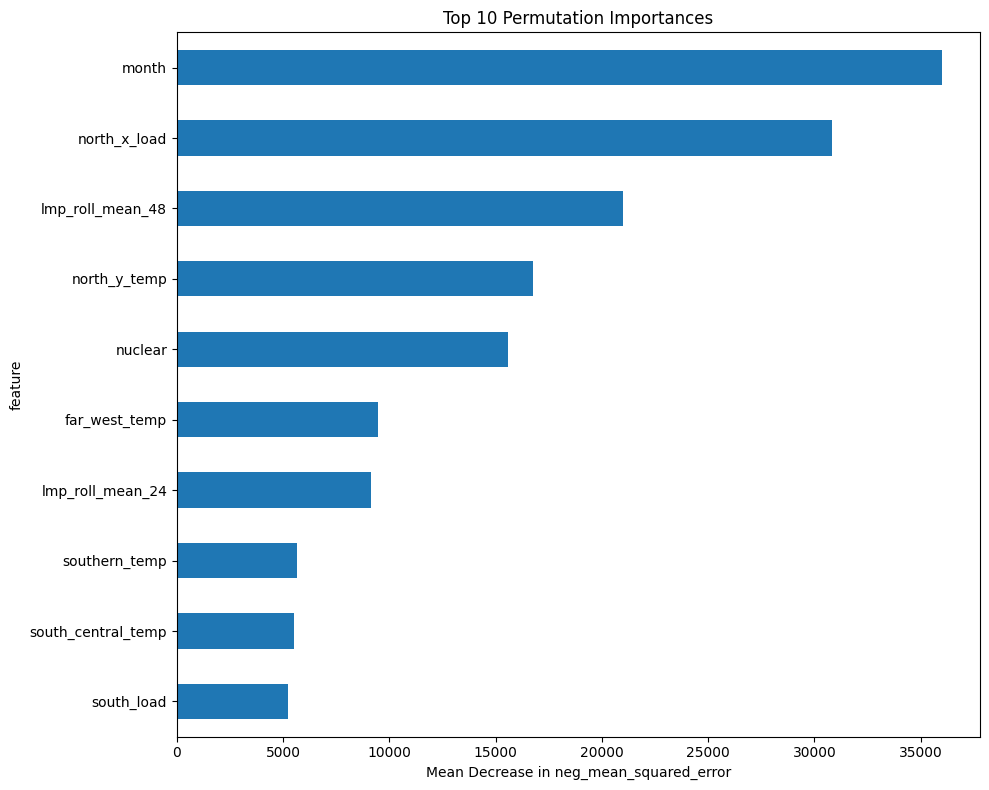

In [25]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# permutation importance
result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error'
)


perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

print(perm_df)


top_n = 10
perm_df.head(top_n).plot(
    kind='barh',
    x='feature',
    y='importance',
    figsize=(10, 8),
    legend=False
)
plt.title(f"Top {top_n} Permutation Importances")
plt.gca().invert_yaxis()
plt.xlabel("Mean Decrease in neg_mean_squared_error")
plt.tight_layout()
plt.show()


### Hyperparameter tuning

In [26]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#--------------------------------------------------------

#
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

#
def objective(trial):
    params = {
        "objective":          "regression",
        "metric":             "rmse",
        "num_leaves":         trial.suggest_int("num_leaves", 20, 150),
        "max_depth":          trial.suggest_int("max_depth", 3, 12),
        "learning_rate":      trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "min_child_samples":  trial.suggest_int("min_child_samples", 5, 100),
        "min_split_gain":     trial.suggest_float("min_split_gain", 0.0, 5.0),
        "subsample":          trial.suggest_float("subsample", 0.5, 1.0),
        "subsample_freq":     trial.suggest_int("subsample_freq", 1, 10),
        "colsample_bytree":   trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha":          trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda":         trial.suggest_float("reg_lambda", 0.0, 5.0),
        #
        "verbosity":          -1,
        "random_state":       42
    }

    fold_rmse = []
    for train_idx, val_idx in tscv.split(X_train):
        #
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        gbm = lgb.LGBMRegressor(**params, n_estimators=1000)
        gbm.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            #
            callbacks=[lgb.log_evaluation(0)]
        )

        preds = gbm.predict(X_val)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val, preds)))

    return float(np.mean(fold_rmse))


#
study = optuna.create_study(direction="minimize", study_name="lgb_lmp_tuning_tsCV")
study.optimize(objective, n_trials=50, timeout=600)

#
print("Best CV RMSE: {:.4f}".format(study.best_value))
print("Best params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")




[I 2025-04-25 13:01:46,358] A new study created in memory with name: lgb_lmp_tuning_tsCV
[I 2025-04-25 13:02:01,140] Trial 0 finished with value: 223.23619701570743 and parameters: {'num_leaves': 29, 'max_depth': 8, 'learning_rate': 0.07131326296822191, 'min_child_samples': 59, 'min_split_gain': 0.44323158265181184, 'subsample': 0.841083202332042, 'subsample_freq': 7, 'colsample_bytree': 0.6605524437554624, 'reg_alpha': 2.553331877865652, 'reg_lambda': 1.9060028078965818}. Best is trial 0 with value: 223.23619701570743.
[I 2025-04-25 13:02:20,983] Trial 1 finished with value: 237.9572303250954 and parameters: {'num_leaves': 47, 'max_depth': 10, 'learning_rate': 0.19501928623829282, 'min_child_samples': 73, 'min_split_gain': 3.477612231088773, 'subsample': 0.5460374043680472, 'subsample_freq': 6, 'colsample_bytree': 0.9657473593705725, 'reg_alpha': 1.1538458742006945, 'reg_lambda': 2.387154477603902}. Best is trial 0 with value: 223.23619701570743.
[I 2025-04-25 13:02:26,499] Trial 2 fi

Best CV RMSE: 192.5452
Best params:
  num_leaves: 98
  max_depth: 10
  learning_rate: 0.0010098588490029367
  min_child_samples: 81
  min_split_gain: 3.040684995481636
  subsample: 0.740214681037645
  subsample_freq: 5
  colsample_bytree: 0.5095360685767087
  reg_alpha: 4.958115163602218
  reg_lambda: 2.1370161059713477


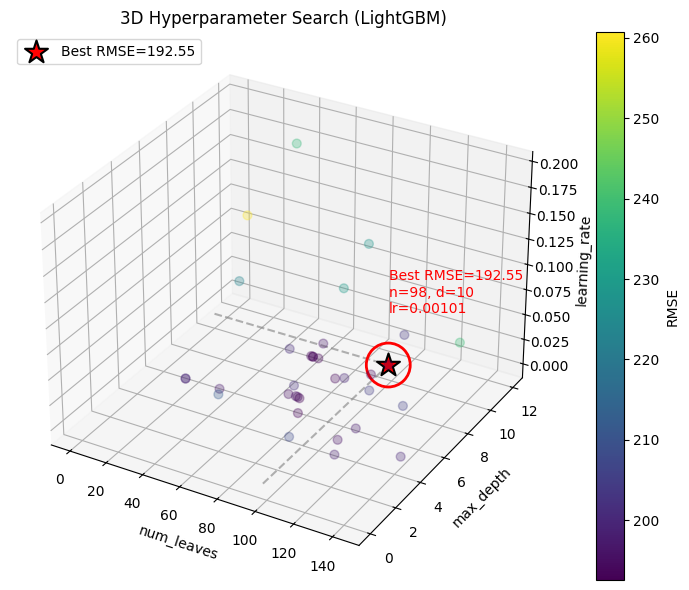

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#
xs   = [t.params["num_leaves"]       for t in study.trials]
ys   = [t.params["max_depth"]        for t in study.trials]
zs   = [t.params["learning_rate"]    for t in study.trials]
vals = [t.value                       for t in study.trials]  # RMSE

#
best = study.best_trial
xb, yb, zb = (
    best.params["num_leaves"],
    best.params["max_depth"],
    best.params["learning_rate"]
)
vb = best.value  #

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection="3d")

#
ax.scatter(xs, ys, zs,
           c=vals,
           cmap="viridis",
           s=40,
           alpha=0.3)

#
ax.scatter([xb], [yb], [zb],
           c="red",
           marker="*",
           s=300,
           edgecolors="k",
           linewidths=1.5,
           label=f"Best RMSE={vb:.2f}")

#
ax.scatter([xb], [yb], [zb],
           facecolors="none",
           edgecolors="red",
           s=1000,
           linewidths=2)

# 4) 投影参考线（可选）
ax.plot([xb, xb], [yb, yb], [0, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([xb, xb], [0, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)
ax.plot([0, xb], [yb, yb], [zb, zb],
        linestyle="--", color="gray", alpha=0.6)

#

ax.text(xb, yb, zb + 0.05,
        f"Best RMSE={vb:.2f}\nn={xb}, d={yb}\nlr={zb:.3g}",
        color="red", fontsize=10, ha="left", va="bottom")

#
ax.set_xlabel("num_leaves")
ax.set_ylabel("max_depth")
ax.set_zlabel("learning_rate")
ax.set_title("3D Hyperparameter Search (LightGBM)")

#
mappable = plt.cm.ScalarMappable(cmap="viridis")
mappable.set_array(vals)
fig.colorbar(mappable, ax=ax, label="RMSE")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()


### Final training

In [28]:
# 5. 用最优超参在全量训练集上重训练，并在测试集上评估
best_params = study.best_params
final_model = lgb.LGBMRegressor(
    **best_params,
    objective="regression",
    metric="rmse",
    n_estimators=1000,
    verbosity=-1,
    random_state=42
)
final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.log_evaluation(0)]
)

# 测试集评估
y_pred = final_model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
print(f"Final Test RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Final Test RMSE: 77.9466, MAE: 32.4589


## 6.3 LSTM

In [ ]:
#copy and pasted from Zixiao's new version (to try to get this to run properly)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

#
exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

#
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['lmp_HB_BUSAVG']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['lmp_HB_BUSAVG']])

#
horizon = 168

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24, horizon=168):
        self.X = X
        self.y = y
        self.seq_len = seq_len
        self.horizon = horizon

    def __len__(self):
        #
        return len(self.X) - self.seq_len - self.horizon + 1

    def __getitem__(self, idx):
        x_seq = self.X[idx : idx + self.seq_len]                                # [seq_len, n_features]
        y_seq = self.y[idx + self.seq_len + self.horizon - 1]                   # scalar target at t + seq_len + horizon - 1
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

#  seq_len（history window）
seq_len = 24

train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len=seq_len, horizon=horizon)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len=seq_len, horizon=horizon)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)

#
class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: [batch, seq_len, n_features]
        out, _ = self.lstm(x)         # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]           #
        return self.fc(out)           # [batch, 1]

device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model     = LSTMRegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss   = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")

#
model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred)
        ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))

mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred,         label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('LMP_HB_BUSAVG')
plt.title('LMP Prediction: True vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

#
exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

#
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['lmp_HB_BUSAVG']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['lmp_HB_BUSAVG']])

#
horizon = 168

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24, horizon=168):
        self.X = X
        self.y = y
        self.seq_len = seq_len
        self.horizon = horizon

    def __len__(self):
        #
        return len(self.X) - self.seq_len - self.horizon + 1

    def __getitem__(self, idx):
        x_seq = self.X[idx : idx + self.seq_len]                                # [seq_len, n_features]
        y_seq = self.y[idx + self.seq_len + self.horizon - 1]                   # scalar target at t + seq_len + horizon - 1
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

#  seq_len（history window）
seq_len = 48

train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len=seq_len, horizon=horizon)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len=seq_len, horizon=horizon)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)

#
class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: [batch, seq_len, n_features]
        out, _ = self.lstm(x)         # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]           #
        return self.fc(out)           # [batch, 1]

device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model     = LSTMRegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss   = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")

#
model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred)
        ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))

mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred,         label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('LMP_HB_BUSAVG')
plt.title('LMP Prediction: True vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()

### Hyperparameter tuning

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


df = pd.read_csv('all_hourly_data.csv')
df['interval_start_local'] = pd.to_datetime(df['interval_start_local'], utc=True)


df['day_of_week']  = df['interval_start_local'].dt.dayofweek
df['day_of_month'] = df['interval_start_local'].dt.day
df['month']        = df['interval_start_local'].dt.month

for lag in [1, 2, 3, 24, 48]:
    df[f'lmp_lag_{lag}'] = df['lmp_HB_BUSAVG'].shift(lag)

df['lmp_roll_mean_24']  = df['lmp_HB_BUSAVG'].rolling(24).mean()
df['lmp_roll_mean_48']  = df['lmp_HB_BUSAVG'].rolling(48).mean()
df['lmp_roll_mean_168'] = df['lmp_HB_BUSAVG'].rolling(168).mean()


df['target_24h'] = df['lmp_HB_BUSAVG'].shift(-24)

df = df.dropna().reset_index(drop=True)


train_start = pd.Timestamp('2018-01-08 06:00:00+0000', tz='UTC')
train_end   = pd.Timestamp('2023-12-31 23:59:59+0000', tz='UTC')
test_start  = pd.Timestamp('2024-01-01 00:00:00+0000', tz='UTC')
test_end    = pd.Timestamp('2025-04-13 04:00:00+0000', tz='UTC')

mask_train = (df['interval_start_local'] >= train_start) & (df['interval_start_local'] <= train_end)
mask_test  = (df['interval_start_local'] >= test_start)  & (df['interval_start_local'] <= test_end)

train_df = df.loc[mask_train].reset_index(drop=True)
test_df  = df.loc[mask_test].reset_index(drop=True)


exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG', 'target_24h']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['target_24h']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['target_24h']])


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X, self.y, self.seq_len = X, y, seq_len

    def __len__(self):
        return len(self.X) - self.seq_len

    def __getitem__(self, idx):
        x_seq = self.X[idx:idx+self.seq_len]
        y_seq = self.y[idx+self.seq_len]
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

seq_len = 24
train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)


class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size=n_features,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out)

device = torch.device('cpu')
model  = LSTMRegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")


model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred)
        ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))

mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")

### Standardization

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # force CPU use

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# — assume train_df and test_df are already loaded and preprocessed —

# 1. Select feature columns and target
exclude_cols = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

# 2. Initialize StandardScalers
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# 3. Fit/transform train and transform test
X_train_all = scaler_x.fit_transform(train_df[feature_cols])
y_train_all = scaler_y.fit_transform(train_df[['lmp_HB_BUSAVG']])
X_test_all  = scaler_x.transform(test_df[feature_cols])
y_test_all  = scaler_y.transform(test_df[['lmp_HB_BUSAVG']])

# 4. Dataset for sequences
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24):
        self.X, self.y, self.seq_len = X, y, seq_len
    def __len__(self):
        return len(self.X) - self.seq_len
    def __getitem__(self, idx):
        seq_x = self.X[idx : idx + self.seq_len]
        seq_y = self.y[idx + self.seq_len]
        return torch.FloatTensor(seq_x), torch.FloatTensor(seq_y)

seq_len = 24
train_ds = TimeSeriesDataset(X_train_all, y_train_all, seq_len)
test_ds  = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)

# 5. GRU model
class GRURegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.gru = nn.GRU(input_size=n_features,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True)
        self.fc  = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, _ = self.gru(x)            # [batch, seq_len, hidden_size]
        out     = out[:, -1, :]         # take last time step
        return self.fc(out)             # [batch, 1]

device = torch.device('cpu')
model  = GRURegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 6. Training loop
n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb).squeeze(1)
        loss  = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")

# 7. Evaluation
model.eval()
all_preds, all_trues = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        preds = model(xb).squeeze(1).cpu().numpy()
        all_preds.append(preds)
        all_trues.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(all_trues).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(all_preds).reshape(-1,1))

mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")


## 6.4 GRU

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

#
exclude_cols   = ['interval_start_local', 'date', 'lmp_HB_BUSAVG']
feature_cols   = [c for c in train_df.columns if c not in exclude_cols]

#
scaler_x       = MinMaxScaler()
scaler_y       = MinMaxScaler()
X_train_all    = scaler_x.fit_transform(train_df[feature_cols])
y_train_all    = scaler_y.fit_transform(train_df[['lmp_HB_BUSAVG']])
X_test_all     = scaler_x.transform(test_df[feature_cols])
y_test_all     = scaler_y.transform(test_df[['lmp_HB_BUSAVG']])

#
horizon        = 168

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=24, horizon=168):
        self.X = X
        self.y = y
        self.seq_len = seq_len
        self.horizon = horizon

    def __len__(self):
        return len(self.X) - self.seq_len - self.horizon + 1

    def __getitem__(self, idx):
        x_seq = self.X[idx : idx + self.seq_len]
        y_seq = self.y[idx + self.seq_len + self.horizon - 1]
        return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq)

#
seq_len = 24

train_ds      = TimeSeriesDataset(X_train_all, y_train_all, seq_len=seq_len, horizon=horizon)
test_ds       = TimeSeriesDataset(X_test_all,  y_test_all,  seq_len=seq_len, horizon=horizon)

train_loader  = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader   = DataLoader(test_ds,  batch_size=64, shuffle=False)

# --
class GRURegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=1):
        super().__init__()
        self.gru = nn.GRU(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc  = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: [batch, seq_len, n_features]
        out, _ = self.gru(x)           # out: [batch, seq_len, hidden_size]
        out     = out[:, -1, :]        # 取最后一个时间步的隐藏状态
        return self.fc(out)            # [batch, 1]

device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model     = GRURegressor(n_features=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#
n_epochs = 20
for epoch in range(1, n_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb).squeeze(1)
        loss   = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs}, Train MSE={avg_loss:.6f}")

#
model.eval()
ys, preds = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb     = xb.to(device)
        y_pred = model(xb).squeeze(1).cpu().numpy()
        preds.append(y_pred)
        ys.append(yb.numpy())

y_true = scaler_y.inverse_transform(np.concatenate(ys).reshape(-1,1))
y_pred = scaler_y.inverse_transform(np.concatenate(preds).reshape(-1,1))

mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
print(f" MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")
